### Step 1: Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

# hide warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
# set seaborn theme if you prefer
sns.set(style="white")


In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
#to view big dataframe

In [3]:
# Importing all datasets
demo_data = pd.read_csv("Demographic data.csv")
demo_data=demo_data.drop_duplicates(keep='first') #drop duplicates keep first instance of duplicate
demo_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [4]:
dup_demo_ID=demo_data[demo_data.duplicated(['Application ID'], keep=False)][['Application ID','Age', 'Performance Tag']]
#Shows Application ID which are duplicate. 
#False makes all duplicates are flagged. First make sure all but first duplicate is flagged duplicate
#Age column added to show it is not duplicate entry
print(dup_demo_ID) #Shows 3 duplicated



       Application ID  Age  Performance Tag
5243        653287861   26              0.0
24386       765011468   57              0.0
27586       765011468   38              0.0
42637       653287861   40              1.0
48602       671989187   27              0.0
59022       671989187   57              0.0


In [5]:
demo_data_clean=demo_data[~demo_data.duplicated(['Application ID'], keep='last')]
demo_data_clean.info()
#Keep 'last' to retain the duplicate with performance tag=1. Appication ID=653287861

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71292 non-null int64
Age                                            71292 non-null int64
Gender                                         71290 non-null object
Marital Status (at the time of application)    71286 non-null object
No of dependents                               71289 non-null float64
Income                                         71292 non-null float64
Education                                      71173 non-null object
Profession                                     71278 non-null object
Type of residence                              71284 non-null object
No of months in current residence              71292 non-null int64
No of months in current company                71292 non-null int64
Performance Tag                                69867 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


In [6]:
#Check. Retained the defaulter. Yes
demo_data_clean[demo_data_clean['Application ID']==653287861]

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0


In [7]:
CB_data = pd.read_csv("Credit Bureau data.csv")
CB_data=CB_data.drop_duplicates(keep='first') #drop duplicates keep first instance of duplicate

CB_data.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [8]:
dup_CB_ID=demo_data[demo_data.duplicated(['Application ID'], keep=False)]['Application ID']
#Shows Application ID which are duplicate. 
#False makes all duplicates are flagged. First make sure all but first duplicate is flagged duplicate
print(dup_CB_ID)

5243     653287861
24386    765011468
27586    765011468
42637    653287861
48602    671989187
59022    671989187
Name: Application ID, dtype: int64


In [9]:
CB_data_clean=CB_data[~CB_data.duplicated(['Application ID'], keep='last')] #remove duplicate ID. keep last instance
CB_data_clean=CB_data_clean.drop('Performance Tag', axis=1)
#Remove perfamnce tag from Credit Bureau data before merging
CB_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71294
Data columns (total 18 columns):
Application ID                                                     71292 non-null int64
No of times 90 DPD or worse in last 6 months                       71292 non-null int64
No of times 60 DPD or worse in last 6 months                       71292 non-null int64
No of times 30 DPD or worse in last 6 months                       71292 non-null int64
No of times 90 DPD or worse in last 12 months                      71292 non-null int64
No of times 60 DPD or worse in last 12 months                      71292 non-null int64
No of times 30 DPD or worse in last 12 months                      71292 non-null int64
Avgas CC Utilization in last 12 months                             70234 non-null float64
No of trades opened in last 6 months                               71291 non-null float64
No of trades opened in last 12 months                              71292 non-null int64
No of P

In [10]:
#store the column names
CB_col=CB_data_clean.columns
demo_col=demo_data_clean.columns

#### Combining all data files into one consolidated dataframe

In [11]:
# Merging on 'customerID'. Outer only matches overlap of two dataframes i.e. common application ID in demo and CB data
#71292 entries means they are complete match
df = pd.merge(demo_data_clean, CB_data_clean, how='outer', on='Application ID')
df.info()
#Try inner join

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71291
Data columns (total 29 columns):
Application ID                                                     71292 non-null int64
Age                                                                71292 non-null int64
Gender                                                             71290 non-null object
Marital Status (at the time of application)                        71286 non-null object
No of dependents                                                   71289 non-null float64
Income                                                             71292 non-null float64
Education                                                          71173 non-null object
Profession                                                         71278 non-null object
Type of residence                                                  71284 non-null object
No of months in current residence                                  71292 non-null int64
No

### Step 2: Inspecting the Dataframe

In [12]:
df=df.drop_duplicates(keep='first') #drop duplicates keep first instance of duplicate

In [13]:
# Let's check the dimensions of the dataframe
df.shape

(71292, 29)

In [14]:
# let's look at the statistical aspects of the dataframe one column - not all shown here. Add to explore file with any insights
df['Presence of open auto loan'].describe()

count    71292.000000
mean         0.084610
std          0.278302
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Presence of open auto loan, dtype: float64

In [15]:
df[df['Outstanding Balance'].isna()]['Performance Tag'].value_counts()/df[df['Outstanding Balance'].isna()]['Performance Tag'].count()*100

0.0    97.058824
1.0     2.941176
Name: Performance Tag, dtype: float64

In [16]:
df.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
count,7.129200e+04,71292.000000,71289.000000,71292.000000,71292.000000,71292.000000,69867.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,70234.000000,71291.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71020.000000,7.102000e+04,71292.000000,71292.000000
mean,4.989518e+08,44.943388,2.865183,27.195464,34.561704,33.957976,0.042194,0.270311,0.430525,0.577190,0.450331,0.655487,0.800903,29.696927,2.298102,5.827021,1.206938,2.397478,1.763536,3.535291,0.256435,1.249201e+06,8.186809,0.084610
std,2.885936e+08,9.938837,1.382338,15.514689,36.758203,20.410638,0.201034,0.534168,0.825327,1.074416,0.808380,1.089540,1.331936,29.533535,2.070211,5.065135,1.352949,2.420107,1.971318,3.582241,0.436668,1.278885e+06,7.090860,0.278302
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.483706e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115370e+05,3.000000,0.000000
50%,4.975655e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749945e+05,6.000000,0.000000
75%,7.495782e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920797e+06,10.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000


In [17]:
df.describe(include=["O"])  #Describe categorical data

,Gender,Marital Status (at the time of application),Education,Profession,Type of residence
count,71290,71286,71173,71278,71284
unique,2,2,5,3,5
top,M,Married,Professional,SAL,Rented
freq,54453,60728,24838,40436,53396


In [18]:
df['Performance Tag'].value_counts() #Per tag spread

0.0    66919
1.0     2948
Name: Performance Tag, dtype: int64

round(df['Performance Tag'].value_counts()/df['Performance Tag'].count()*100,2) #Per tag spread


In [19]:
base_default=df['Performance Tag'].value_counts()[1]/df['Performance Tag'].count()
base_default  # Save the overall baseline default rate. Aim is to use predictive modelling to bring this down

0.04219445517912605

In [20]:
df[df['Performance Tag'].isna()].describe()
#1425 NA Performance tag

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
count,1.425000e+03,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,0.0,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1390.000000,1425.000000,1425.000000,1425.000000,1425.00000,1425.000000,1425.000000,1425.000000,1.425000e+03,1425.000000,1425.000000
mean,4.859020e+08,42.367018,3.141053,16.740351,32.370526,22.144561,NaN,1.316491,2.335439,3.209825,2.190877,3.209123,4.086316,51.079856,2.932632,7.883509,2.056842,4.06386,2.035789,4.035789,0.098947,1.045252e+06,8.771930,0.072281
std,2.902776e+08,10.051170,1.181151,13.710898,32.204102,19.889198,NaN,0.788908,1.079579,1.257076,1.010507,1.245126,1.402842,21.387813,1.224611,2.505144,1.062775,1.47764,1.072241,1.474306,0.298696,8.246355e+05,2.572936,0.259043
min,2.070750e+05,22.000000,1.000000,4.500000,6.000000,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.715500e+04,1.000000,0.000000
25%,2.329800e+08,34.000000,3.000000,5.000000,6.000000,6.000000,NaN,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,35.000000,2.000000,6.000000,1.000000,3.00000,1.000000,3.000000,0.000000,6.101750e+05,7.000000,0.000000
50%,4.765594e+08,41.000000,3.000000,11.000000,19.000000,15.000000,NaN,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,51.000000,3.000000,8.000000,2.000000,4.00000,2.000000,4.000000,0.000000,8.046720e+05,9.000000,0.000000
75%,7.337334e+08,50.000000,4.000000,24.000000,47.000000,34.000000,NaN,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,67.000000,4.000000,10.000000,3.000000,5.00000,3.000000,5.000000,0.000000,1.074624e+06,11.000000,0.000000
max,9.975046e+08,65.000000,5.000000,60.000000,126.000000,75.000000,NaN,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,101.000000,6.000000,14.000000,4.000000,8.00000,4.000000,8.000000,1.000000,4.143938e+06,16.000000,1.000000


In [241]:
#Reject dataframe is when performance tag is null. Perhaps these are customers who were not granted credit card.
reject=df[df['Performance Tag'].isna()]
reject.shape

(1425, 29)

In [22]:
reject.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
69600,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,NaN,0,0,2,1,2,3,30.0,4.0,12,3,7,2,4,0.0,1309623.0,13,0
69601,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,NaN,1,1,1,3,2,2,16.0,3.0,7,3,4,3,5,0.0,775626.0,7,0
69602,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,NaN,3,4,5,3,5,6,83.0,2.0,7,2,4,0,3,0.0,732602.0,8,0
69603,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,NaN,1,3,4,3,4,5,87.0,2.0,7,1,4,4,5,0.0,842057.0,8,0
69604,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,NaN,2,2,4,3,2,6,42.0,3.0,7,2,3,3,6,0.0,786997.0,7,1


In [23]:
#Storing Numerical and categorical vairable names
numerical=df.select_dtypes(exclude=['object']).columns #Pulls numerical columns
numerical=numerical[numerical!='Application ID'] #Application ID is not independent variable i.e. has no bearing on credit worthiness or risk
print(numerical)

categorical=df.select_dtypes(include=['object']).columns  #pulls categorical columns
print(categorical)



Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan'],
      dtype='

In [24]:
# Create function to check distribution/ variation in each column - name, unique values, isnull, dtype. Helps explore data
def unique_col_values(d):
    for column in d:
        print("{}  | {} | {} | {} ".format(d[column].name, len(d[column].unique()), d[column].isnull().sum(), d[column].dtype))
        
unique_col_values(df)

Application ID  | 71292 | 0 | int64 
Age  | 53 | 0 | int64 
Gender  | 3 | 2 | object 
Marital Status (at the time of application)  | 3 | 6 | object 
No of dependents  | 6 | 3 | float64 
Income  | 63 | 0 | float64 
Education  | 6 | 119 | object 
Profession   | 4 | 14 | object 
Type of residence  | 6 | 8 | object 
No of months in current residence  | 121 | 0 | int64 
No of months in current company  | 83 | 0 | int64 
Performance Tag  | 3 | 1425 | float64 
No of times 90 DPD or worse in last 6 months  | 4 | 0 | int64 
No of times 60 DPD or worse in last 6 months  | 6 | 0 | int64 
No of times 30 DPD or worse in last 6 months  | 8 | 0 | int64 
No of times 90 DPD or worse in last 12 months  | 6 | 0 | int64 
No of times 60 DPD or worse in last 12 months  | 8 | 0 | int64 
No of times 30 DPD or worse in last 12 months  | 10 | 0 | int64 
Avgas CC Utilization in last 12 months  | 115 | 1058 | float64 
No of trades opened in last 6 months  | 14 | 1 | float64 
No of trades opened in last 12 months 

#### Impute Nulls. Features with large number of null and outliers will be treated with WOE

In [25]:
demo_data_clean[demo_data_clean['Age']<18]
#Many people with less than 18 age - some of them married and Bachelors and Master degree. this is error

demo_data_clean[demo_data_clean['Marital Status (at the time of application)']=='Single']['Age'].median() #38

#demo_data_clean[demo_data_clean['Marital Status (at the time of application)']=='Married']['Age'].median() #46

#replace low age based on if applicant is married or single
demo_data_clean['Age'] = np.where((demo_data_clean['Age'] < 18) & (demo_data_clean['Marital Status (at the time of application)'] == 'Single'), 38, df['Age']) 
#Single with low age are replaced by median single age
demo_data_clean['Age'] = np.where((demo_data_clean['Age'] < 18) , 46, demo_data_clean['Age'])
#Rest are replaced by median married age

demo_data_clean[demo_data_clean['Age']<18] #Check. no low age left. ok

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag


In [26]:
demo_data_clean["Gender"].fillna("M", inplace = True) #2 nan replaced by Male
demo_data_clean["Marital Status (at the time of application)"].fillna("Married", inplace = True) #6 nan replaced by married
demo_data_clean["No of dependents"].fillna(3, inplace = True)
demo_data_clean["Profession "].fillna("SAL", inplace = True)
demo_data_clean["Type of residence"].fillna("Rented", inplace = True)

In [27]:
#272 people who are Null seem first time credit card owners are Central Bureau have not data apart from 'No of Inquries'. 
#They have no home loan. 
CB_data_clean["Presence of open home loan"].fillna(0, inplace = True) 
CB_data_clean["Outstanding Balance"].fillna(0, inplace = True)
#impute 1 null no of trades by median
CB_data_clean["No of trades opened in last 6 months"].fillna(CB_data_clean["No of trades opened in last 6 months"].median(), inplace = True)


In [28]:
#Income was negative for 81 customers. This negative count was imputed with median value.
demo_data_clean['Income'] = np.where((demo_data_clean['Income'] < 0) , demo_data_clean['Income'].median(),demo_data_clean['Income'] )#Single with low age are replaced by median single age

In [29]:
#merge again after treating small nulls
# Merging on 'customerID'
df = pd.merge(demo_data_clean, CB_data_clean, how='outer', on='Application ID')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71291
Data columns (total 29 columns):
Application ID                                                     71292 non-null int64
Age                                                                71292 non-null int64
Gender                                                             71292 non-null object
Marital Status (at the time of application)                        71292 non-null object
No of dependents                                                   71292 non-null float64
Income                                                             71292 non-null float64
Education                                                          71173 non-null object
Profession                                                         71292 non-null object
Type of residence                                                  71292 non-null object
No of months in current residence                                  71292 non-null int64
No

In [30]:
df['Type of residence'].value_counts(dropna=False) #Explore the variable stats. Dropna=false shows nan counts

Rented                 53404
Owned                  14243
Living with Parents     1817
Company provided        1629
Others                   199
Name: Type of residence, dtype: int64

In [31]:
df.isnull().sum()#*100/len(df.index),4)
#Few columsn have null values. Nulls are less than 2%


Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                           119
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                    1425
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

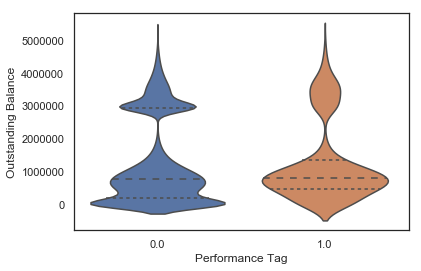

In [32]:
# Violin plot - probability density plot of good and bad customers. Ideal for numerical feature
sns.violinplot( x=df["Performance Tag"], y=df["Outstanding Balance"], scale='area', scale_hue=False, inner='quartile', orient='v' )



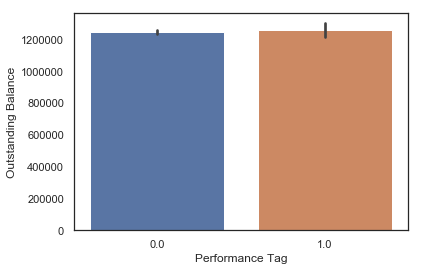

In [33]:
# plot
sns.barplot( x=df["Performance Tag"], y=df["Outstanding Balance"])#, scale='area', scale_hue=False, inner='quartile', orient='v' )
#sns.show()

In [34]:
len(numerical) #used to manage plot layout

23

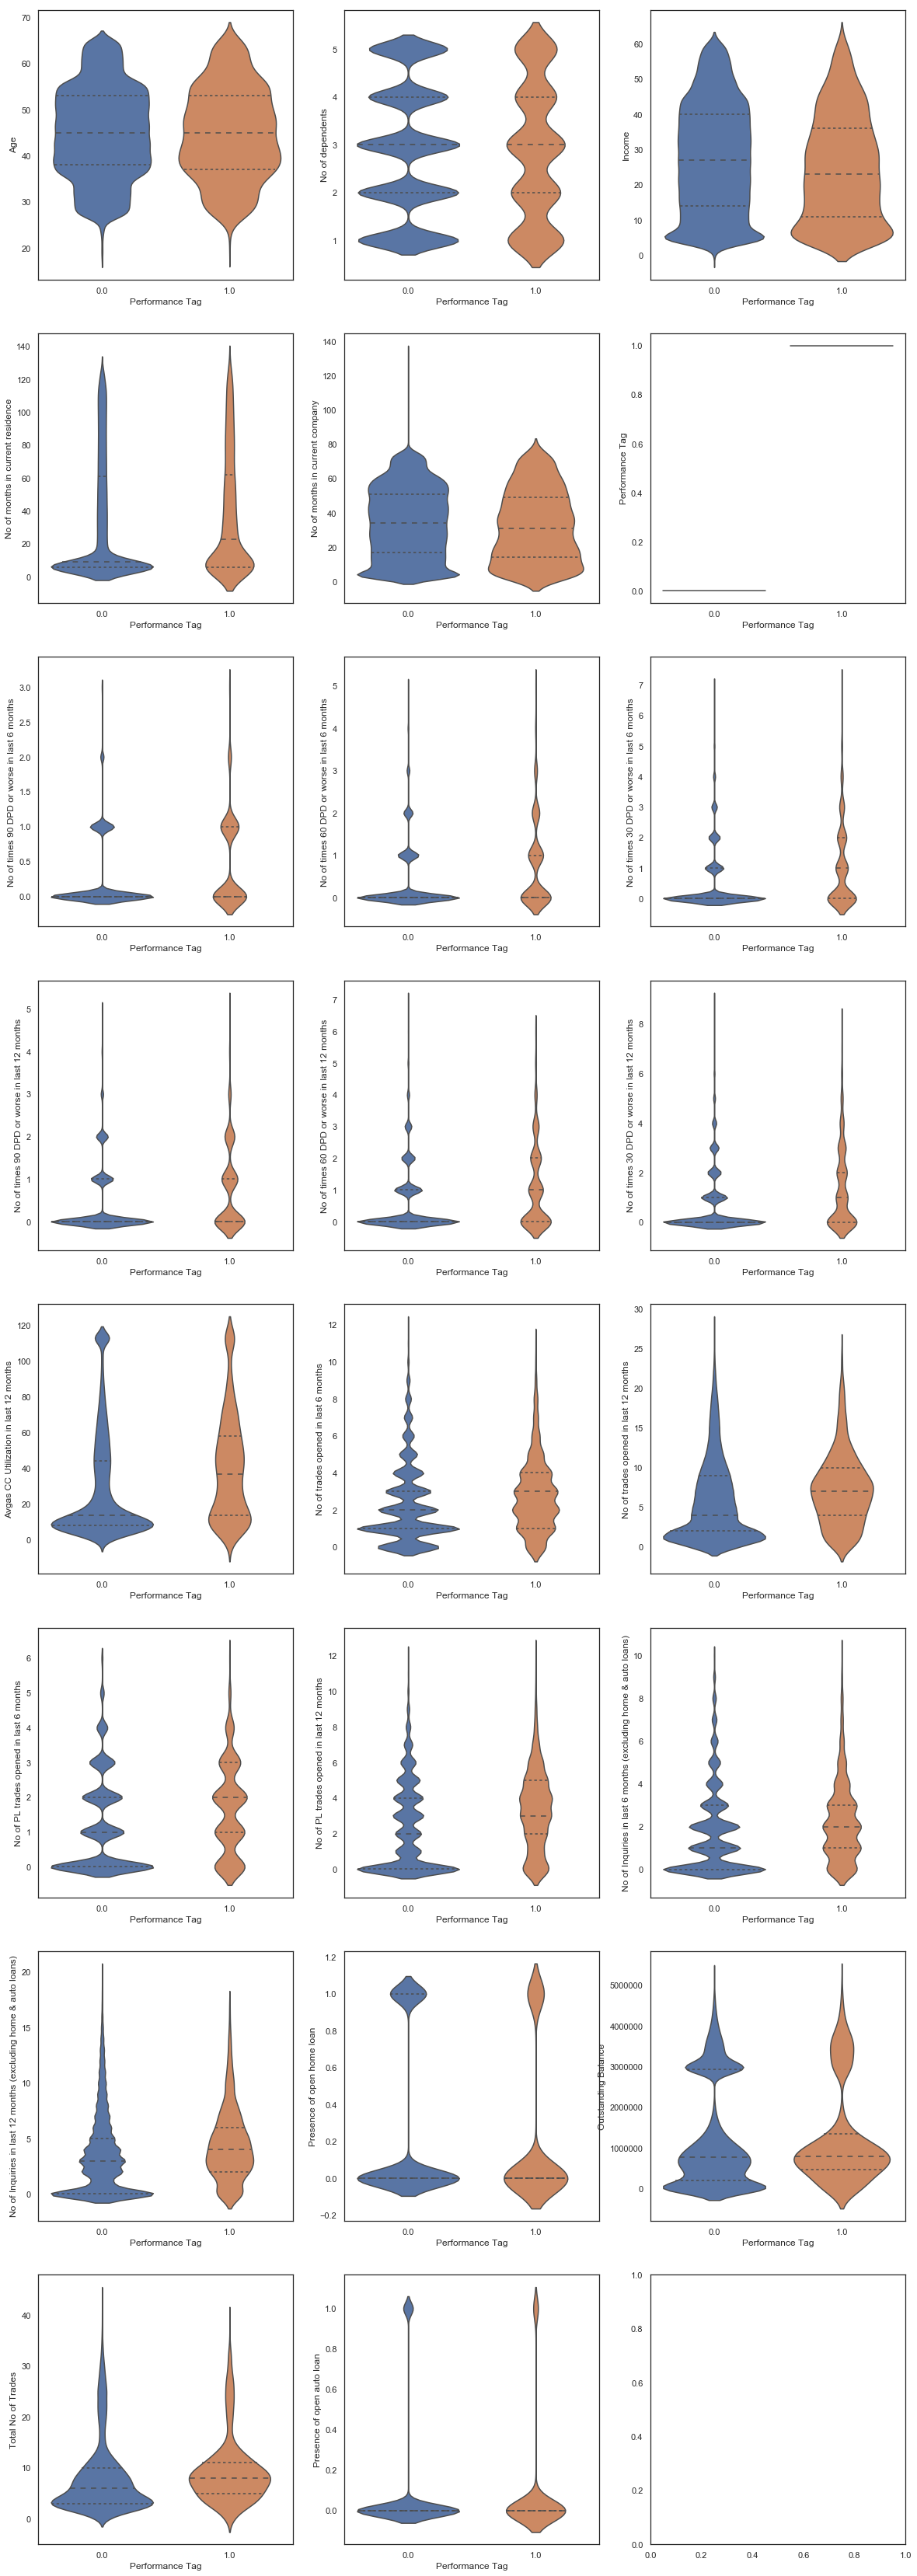

In [35]:
#Plot Numerical features violin plot
#https://dev.to/nexttech/how-to-perform-exploratory-data-analysis-with-seaborn-29eo
fig, ax = plt.subplots(8, 3, figsize=(20, 60))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.violinplot(x=df["Performance Tag"], y=df[variable],inner='quartile' , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

conditions = [(df['Age'] <= 40),  (df['Age'] > 40) & (df['Age']<=50), (df['Age'] >= 50)]
choices = ['Young', 'Mid Age', 'Senior', ]  #Time slot choice corresponsing to above condition

df['Age_Group']=np.select(conditions, choices) #Bin based on IV value

Age_default = pd.crosstab(columns=df["Performance Tag"], index=df["Age_Group"],normalize='index')
Age_group_lift=Age_default[1.0]/base_default

#### Lift Plots - defaul rate comparison over base default rate of categorical or numerical data with integer values (like no of dependents)

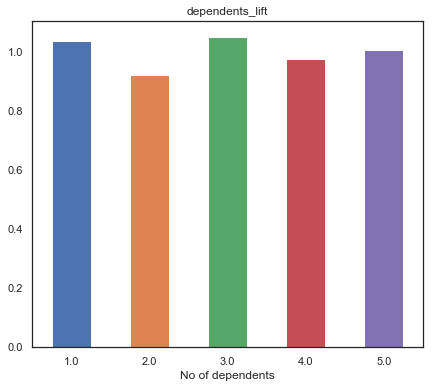

In [36]:
dependents_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of dependents"],normalize='index')
dependents_lift=dependents_default[1.0]/base_default


dependents_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('dependents_lift')

plt.show()
#customers wtih 2 dependents have lowest default rate

In [37]:
dependents_default

Performance Tag,0.0,1.0
No of dependents,,
1.0,0.956170,0.043830
2.0,0.961129,0.038871
3.0,0.955583,0.044417
4.0,0.958830,0.041170
5.0,0.957561,0.042439


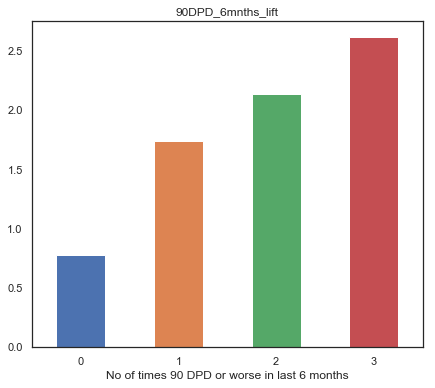

In [38]:
DPD90_6mnths_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of times 90 DPD or worse in last 6 months"],normalize='index')
DPD90_6mnths_lift=DPD90_6mnths_default[1.0]/base_default


DPD90_6mnths_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('90DPD_6mnths_lift')

plt.show()
#More number of DPD means higher chance of default. people with 3 times 90 DPD flagged in 6 months have 2.5 times defaults rate

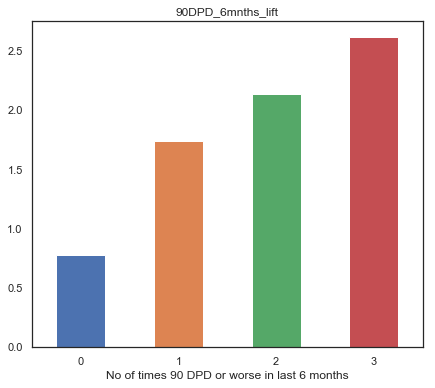

In [39]:
DPD90_6mnths_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of times 90 DPD or worse in last 6 months"],normalize='index')
DPD90_6mnths_lift=DPD90_6mnths_default[1.0]/base_default


DPD90_6mnths_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('90DPD_6mnths_lift')

plt.show()

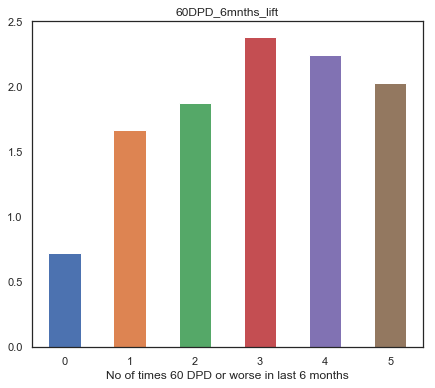

In [40]:
DPD60_6mnths_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of times 60 DPD or worse in last 6 months"],normalize='index')
DPD60_6mnths_lift=DPD60_6mnths_default[1.0]/base_default


DPD60_6mnths_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('60DPD_6mnths_lift')

plt.show()
#Similar to above but 4 or 5 60DPD in 6 months are slightly better than 3. Interesting!

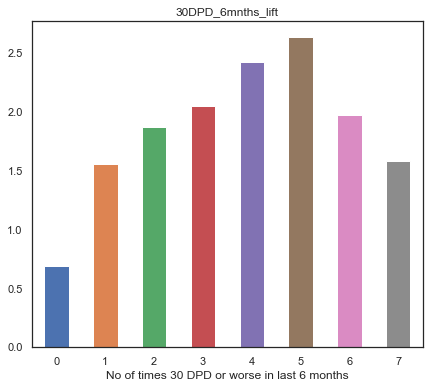

In [41]:
DPD30_6mnths_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of times 30 DPD or worse in last 6 months"],normalize='index')
DPD30_6mnths_lift=DPD30_6mnths_default[1.0]/base_default


DPD30_6mnths_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('30DPD_6mnths_lift')

plt.show()

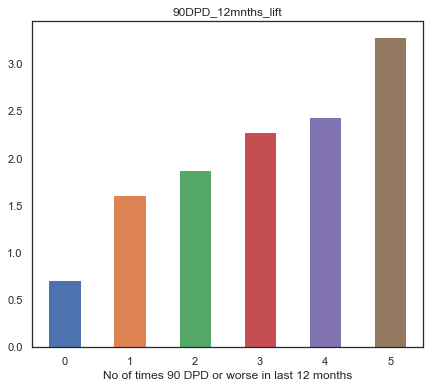

In [42]:
DPD90_12mnths_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of times 90 DPD or worse in last 12 months"],normalize='index')
DPD90_12mnths_lift=DPD90_12mnths_default[1.0]/base_default


DPD90_12mnths_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('90DPD_12mnths_lift')

plt.show()

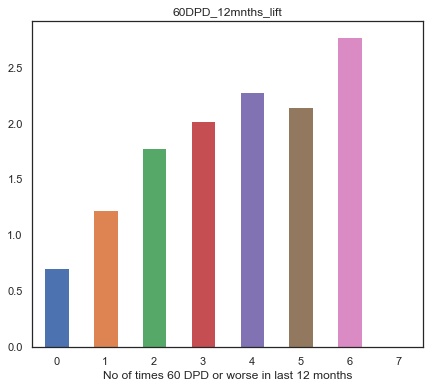

In [43]:
DPD60_12mnths_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of times 60 DPD or worse in last 12 months"],normalize='index')
DPD60_12mnths_lift=DPD60_12mnths_default[1.0]/base_default


DPD60_12mnths_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('60DPD_12mnths_lift')

plt.show()

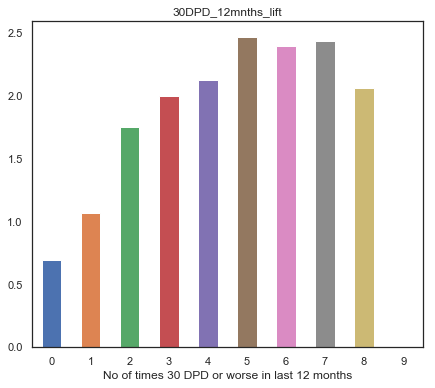

Performance Tag,0.0,1.0
No of times 30 DPD or worse in last 12 months,,
0,0.970662,0.029338
1,0.954854,0.045146
2,0.926108,0.073892
3,0.915619,0.084381
4,0.910083,0.089917
5,0.895662,0.104338
6,0.898936,0.101064
7,0.897196,0.102804
8,0.913043,0.086957


In [44]:
DPD30_12mnths_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of times 30 DPD or worse in last 12 months"],normalize='index')
DPD30_12mnths_lift=DPD30_12mnths_default[1.0]/base_default


DPD30_12mnths_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('30DPD_12mnths_lift')

plt.show()
DPD30_12mnths_default

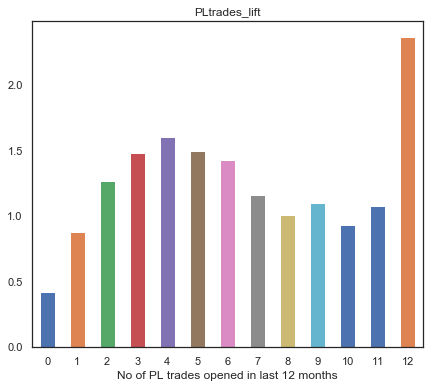

In [45]:
PLtrades_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of PL trades opened in last 12 months"],normalize='index')
PLtrades_lift=PLtrades_default[1.0]/base_default


PLtrades_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('PLtrades_lift')

plt.show()
#Customers with 3,4,5,6 PL trades have high default rate. 12 PL trades is more than 2 times default rate

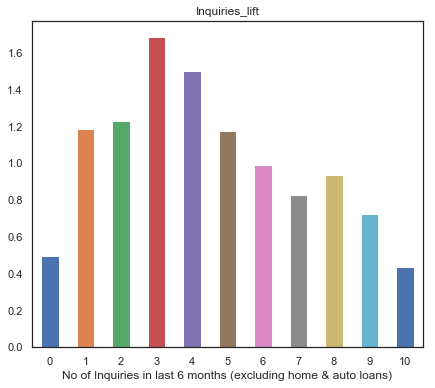

In [46]:
Inquiries_default=pd.crosstab(columns=df["Performance Tag"], index=df["No of Inquiries in last 6 months (excluding home & auto loans)"],normalize='index')
Inquiries_lift=Inquiries_default[1.0]/base_default


Inquiries_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('Inquiries_lift')

plt.show()
#1 to 5 Inquiries have high default rate. Interestingly customers who make very high Inquiries do not default

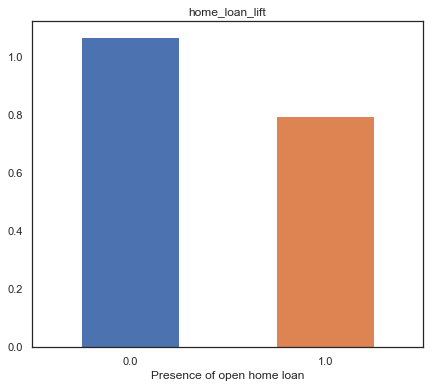

In [47]:
home_loan_default=pd.crosstab(columns=df["Performance Tag"], index=df["Presence of open home loan"],normalize='index')
home_loan_lift=home_loan_default[1.0]/base_default

home_loan_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('home_loan_lift')

plt.show()
#Presence of home shows default lift is lower i.e. safer customers

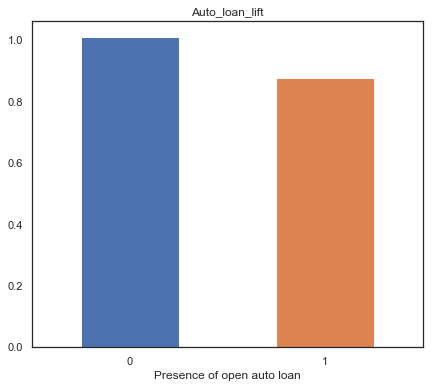

In [48]:
Auto_loan_default=pd.crosstab(columns=df["Performance Tag"], index=df["Presence of open auto loan"],normalize='index')
Auto_loan_lift=Auto_loan_default[1.0]/base_default


Auto_loan_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('Auto_loan_lift')

plt.show()
#People who have auto loan donot default as much

ax=(Age_group_lift).plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('Age_group_lift')

plt.show()
#young people have slight high default. Try different 

#look at density plot - violin plot. seaborn plot

In [49]:
home_loan_default=pd.crosstab(columns=df["Performance Tag"], index=df["Presence of open home loan"],normalize='index')
home_loan_lift=home_loan_default[1.0]/base_default
home_loan_default

Performance Tag,0.0,1.0
Presence of open home loan,,
0.0,0.954803,0.045197
1.0,0.966410,0.033590


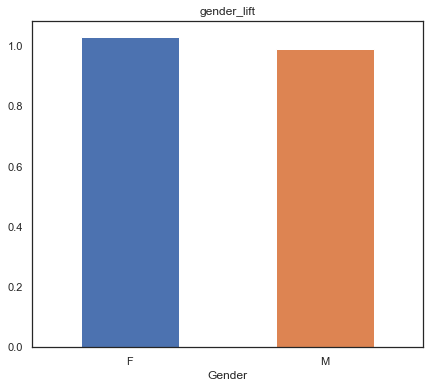

In [50]:
gender_default=pd.crosstab(columns=df["Performance Tag"], index=df["Gender"],normalize='index')
gender_lift=gender_default[1.0]/base_default


gender_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('gender_lift')

plt.show()
#Males are mariginall better

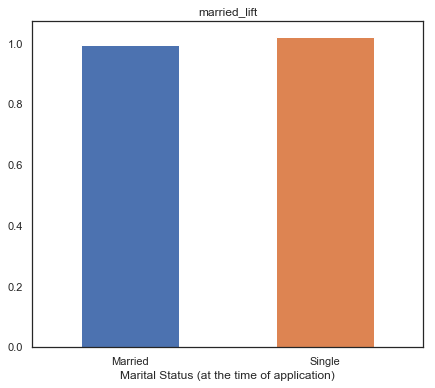

In [51]:
married_default=pd.crosstab(columns=df["Performance Tag"], index=df["Marital Status (at the time of application)"],normalize='index')
married_lift=married_default[1.0]/base_default


married_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('married_lift')

plt.show()
#Married slightly better

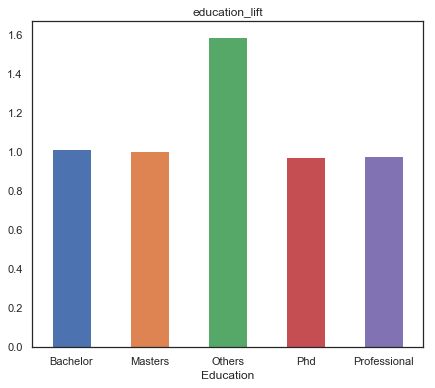

In [52]:
education_default=pd.crosstab(columns=df["Performance Tag"], index=df["Education"],normalize='index')
education_lift=education_default[1.0]/base_default


education_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('education_lift')

plt.show()
#Phd and proffessional are marginaly better

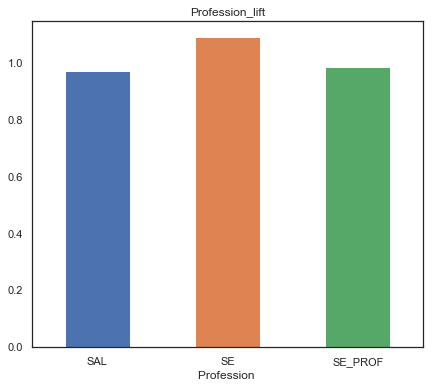

In [53]:
Profession_default=pd.crosstab(columns=df["Performance Tag"], index=df["Profession "],normalize='index')
Profession_lift=Profession_default[1.0]/base_default


Profession_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('Profession_lift')

plt.show()
#Phd and proffessional are marginaly better

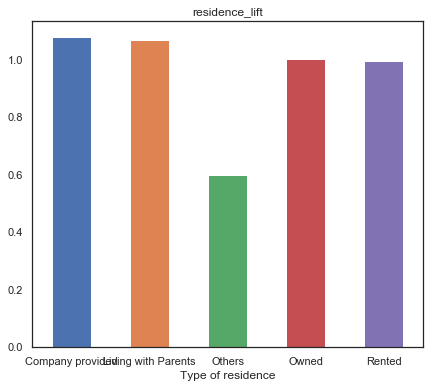

In [54]:
residence_default=pd.crosstab(columns=df["Performance Tag"], index=df["Type of residence"],normalize='index')
residence_lift=residence_default[1.0]/base_default


residence_lift.plot.bar(stacked=False,figsize=(7,6), rot=0)
plt.title('residence_lift')

plt.show()
#Company procided and living with parents have high default rate (more than baseline)
#'Other' residence is surprisingly low default rate

### Calculate WOE and IV

In [55]:
#https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb

# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = np.maximum(d3.EVENT,0.05)/d3.COUNT
    d3["NON_EVENT_RATE"] = np.maximum(d3.NONEVENT,0.05)/d3.COUNT
    d3["DIST_EVENT"] = np.maximum(d3.EVENT,0.05)/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = np.maximum(d3.NONEVENT,0.05)/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["IV"] = (d3.DIST_NON_EVENT-d3.DIST_EVENT)*np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = np.maximum(d3.EVENT,0.05)/d3.COUNT #min added so event and non-event can never be zero
    d3["NON_EVENT_RATE"] = np.maximum(d3.NONEVENT,0.05)/d3.COUNT
    d3["DIST_EVENT"] = np.maximum(d3.EVENT,0.05)/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = np.maximum(d3.NONEVENT,0.05)/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["IV"] = (d3.DIST_NON_EVENT-d3.DIST_EVENT)*np.log(d3.DIST_NON_EVENT/d3.DIST_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [56]:
no_target_null=df[~df['Performance Tag'].isna()] #Remove target null for calculating woe and IV
final_iv, IV = data_vars(no_target_null.drop('Application ID', axis=1),df['Performance Tag'])


In [57]:
# Add new column - predictiveness based on IV value
conditions = [(IV['IV'] < 0.02),  (IV['IV'] >= 0.02) & (IV['IV']<0.1), (IV['IV'] >= 0.1) & (IV['IV'] <0.3), (IV['IV'] >= 0.3) & (IV['IV'] <0.5), (IV['IV'] >= 0.5)]
choices = ['Not useful for prediction', 'Weak predictive Power', 'Medium predictive Power', 'Strong predictive Power', 'Suspicious Predictive Power']  #Time slot choice corresponsing to above condition

IV['Predictiveness'] = np.select(conditions, choices) #Bin based on IV value

IV.sort_values("IV", axis = 0, ascending = False).reset_index() #show IV sorted

,index,VAR_NAME,IV,Predictiveness
0,22,Performance Tag,25.091439,Suspicious Predictive Power
1,1,Avgas CC Utilization in last 12 months,0.294080,Medium predictive Power
2,19,No of trades opened in last 12 months,0.257568,Medium predictive Power
3,6,No of Inquiries in last 12 months (excluding h...,0.229330,Medium predictive Power
4,26,Total No of Trades,0.190047,Medium predictive Power
5,13,No of times 30 DPD or worse in last 12 months,0.188454,Medium predictive Power
6,8,No of PL trades opened in last 12 months,0.176907,Medium predictive Power
7,14,No of times 30 DPD or worse in last 6 months,0.145566,Medium predictive Power
8,15,No of times 60 DPD or worse in last 12 months,0.138085,Medium predictive Power
9,9,No of PL trades opened in last 6 months,0.124556,Medium predictive Power


In [58]:
imp_features=IV.sort_values("IV", axis = 0, ascending = False).reset_index()['VAR_NAME'].head(16).values.tolist() 
#Take top 16 useful features values to list makes it a list
imp_features

['Performance Tag',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 12 months',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Total No of Trades',
 'No of times 30 DPD or worse in last 12 months',
 'No of PL trades opened in last 12 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of trades opened in last 6 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of times 60 DPD or worse in last 6 months',
 'No of months in current residence',
 'Income']

In [59]:
final_iv=final_iv[final_iv['COUNT']!=0]
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,18,40,24595,1072.0,4.358609e-02,23523.0,0.956414,0.363636,3.515145e-01,-0.033903,0.000748
1,Age,41,50,22913,958.0,4.181033e-02,21955.0,0.958190,0.324966,3.280832e-01,0.009546,0.000748
2,Age,51,65,22359,918.0,4.105729e-02,21441.0,0.958943,0.311398,3.204023e-01,0.028507,0.000748
4,Gender,F,F,16506,718.0,4.349933e-02,15788.0,0.956501,0.243555,2.359270e-01,-0.031820,0.000370
5,Gender,M,M,53361,2230.0,4.179082e-02,51131.0,0.958209,0.756445,7.640730e-01,0.010033,0.000370
7,Marital Status (at the time of application),Married,Married,59551,2503.0,4.203120e-02,57048.0,0.957969,0.849050,8.524933e-01,0.004047,0.000144
8,Marital Status (at the time of application),Single,Single,10316,445.0,4.313687e-02,9871.0,0.956863,0.150950,1.475067e-01,-0.023074,0.000144
10,No of dependents,1,3,45992,1950.0,4.239868e-02,44042.0,0.957601,0.661465,6.581389e-01,-0.005042,0.000100
11,No of dependents,4,5,23875,998.0,4.180105e-02,22877.0,0.958199,0.338535,3.418611e-01,0.009778,0.000100
13,Income,0,10,12760,711.0,5.572100e-02,12049.0,0.944279,0.241180,1.800535e-01,-0.292291,0.037946


In [60]:
#Plot WOE of range
final_iv1=final_iv
final_iv1['RANGE_NUM']=final_iv1["MIN_VALUE"].map(str) + '-'+ final_iv1["MAX_VALUE"].map(str) #Helps plot numeric features
final_iv1['RANGE_CAT']=final_iv1["MIN_VALUE"].map(str)  #Helps plot categorical features

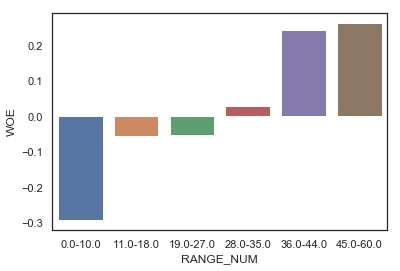

In [61]:
#Example
temp=final_iv1[final_iv1['VAR_NAME']=='Income']
sns.barplot(x=temp["RANGE_NUM"], y=temp['WOE'])
label.set_rotation(90)

#### Using WOE to impute or treat nulls

In [62]:
df1=df.copy()
CB1=CB_data_clean.copy()
demo1=demo_data_clean.copy()

#Education from WOE: impute NAN as MASTERS as their WOE are similar - coarse binning
#other nulls have  different Woe from other bins and hence will not impute.
df1["Education"].fillna("Masters", inplace = True)
demo1["Education"].fillna("Masters", inplace = True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71291
Data columns (total 29 columns):
Application ID                                                     71292 non-null int64
Age                                                                71292 non-null int64
Gender                                                             71292 non-null object
Marital Status (at the time of application)                        71292 non-null object
No of dependents                                                   71292 non-null float64
Income                                                             71292 non-null float64
Education                                                          71292 non-null object
Profession                                                         71292 non-null object
Type of residence                                                  71292 non-null object
No of months in current residence                                  71292 non-null int64
No

### Apply WOE values to your dataframe columns

In [63]:
df_woe=df1.drop('Application ID', axis=1).copy()
CB_woe=CB1.drop('Application ID', axis=1).copy()
demo_woe=demo1.drop('Application ID', axis=1).copy()

In [64]:
feature_list = df_woe.columns.difference(['Performance Tag'])
#feature_list_CB = CB_woe.columns.difference(['Performance Tag'])
#feature_list_demo= demo_woe.columns.difference(['Performance Tag'])


transform_prefix = '' # leave this value blank if you need replace the original column values

In [65]:
feature_list

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education', 'Gender',
       'Income', 'Marital Status (at the time of application)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Presence of open auto loan', 'Presence of open home

In [66]:
for var in feature_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    small_df=small_df[final_iv['MIN_VALUE'].notnull()]
    
    small_df_null = final_iv[final_iv['VAR_NAME'] == var][final_iv['MIN_VALUE'].isnull()]
    nan_woe=small_df_null['WOE'].mean()  #Store the WOE for missing bin
    
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items(), key=lambda kv: kv[0], reverse=False):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '

    replace_cmd = replace_cmd + 'nan_woe'
    replace_cmd1 = replace_cmd1 + 'nan_woe'
    
    
    if replace_cmd != '0':
        try:
            df_woe[transform_prefix + var] = df_woe[var].apply(lambda x: eval(replace_cmd))           
        except:            
            df_woe[transform_prefix + var] = df_woe[var].apply(lambda x: eval(replace_cmd1))
            

C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reind

C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reind

In [67]:
df_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71291
Data columns (total 28 columns):
Age                                                                71292 non-null float64
Gender                                                             71292 non-null float64
Marital Status (at the time of application)                        71292 non-null float64
No of dependents                                                   71292 non-null float64
Income                                                             71292 non-null float64
Education                                                          71292 non-null float64
Profession                                                         71292 non-null float64
Type of residence                                                  71292 non-null float64
No of months in current residence                                  71292 non-null float64
No of months in current company                                    71292 non-null

In [68]:
CB_col

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan'],
      dtype='object')

In [69]:
demo_woe=df_woe[demo_col[demo_col !='Application ID']]

In [70]:
CB_woe=df_woe[CB_col[CB_col !='Application ID']]

In [71]:
CB_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71292 entries, 0 to 71291
Data columns (total 17 columns):
No of times 90 DPD or worse in last 6 months                       71292 non-null float64
No of times 60 DPD or worse in last 6 months                       71292 non-null float64
No of times 30 DPD or worse in last 6 months                       71292 non-null float64
No of times 90 DPD or worse in last 12 months                      71292 non-null float64
No of times 60 DPD or worse in last 12 months                      71292 non-null float64
No of times 30 DPD or worse in last 12 months                      71292 non-null float64
Avgas CC Utilization in last 12 months                             71292 non-null float64
No of trades opened in last 6 months                               71292 non-null float64
No of trades opened in last 12 months                              71292 non-null float64
No of PL trades opened in last 6 months                            71292 non-null

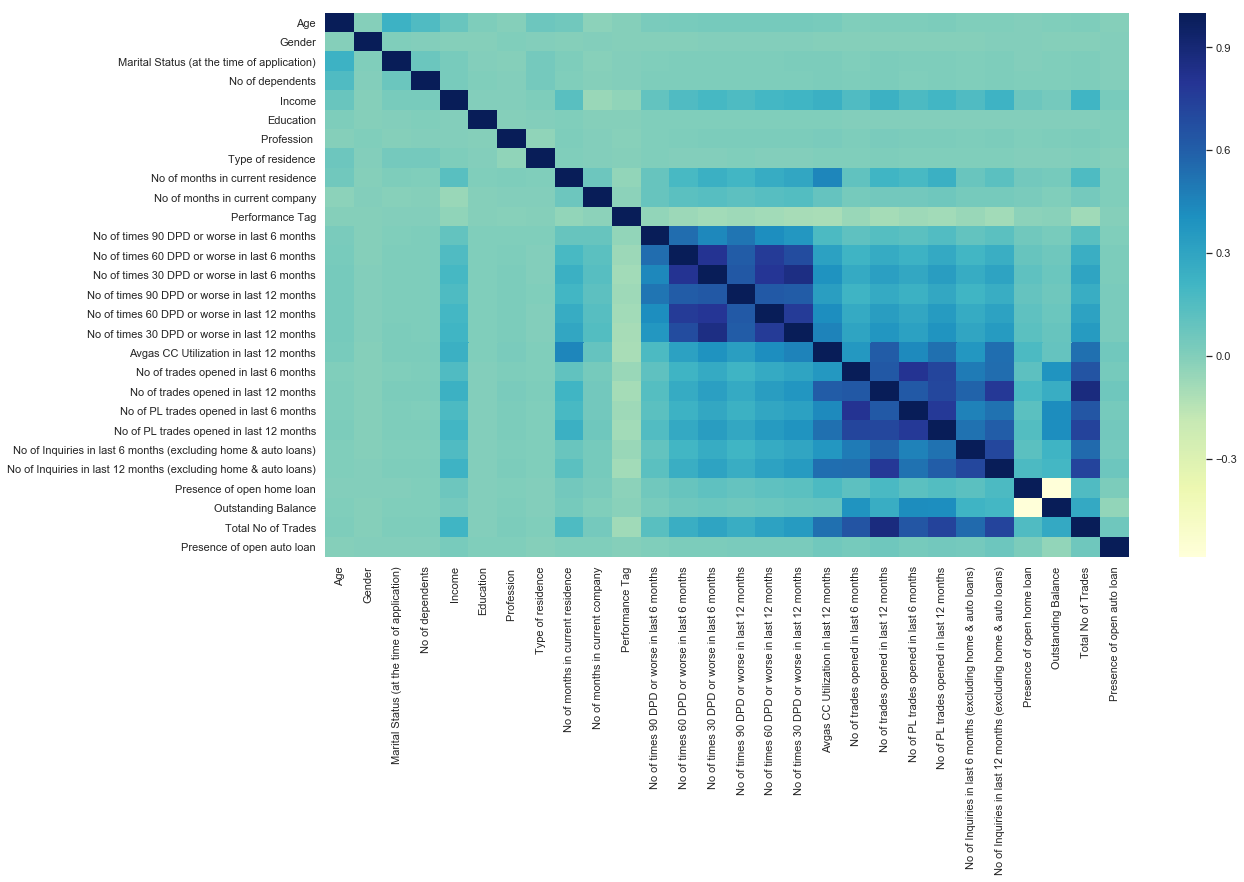

In [72]:
plt.figure(figsize = (18,10))
sns.heatmap(df_woe.corr(), annot = False, cmap="YlGnBu")
plt.show()

#We see  multi collinearity going on. WIll treat them during model building

#### Model Preprocessing

In [73]:
#Implort ML libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

##### Comparison which of whole data or demo data provides more insights

In [74]:
#Creating the X and y variables - Using only demographic data
X = demo_woe[~demo_woe['Performance Tag'].isna()].drop('Performance Tag', 1)
y = demo_woe[~demo_woe['Performance Tag'].isna()]["Performance Tag"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
#Using demo data
#SMote resampling helps to oversample the minority label
sm = SMOTE(random_state=27)#, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

smote = LogisticRegression().fit(X_train_res, y_train_res)

smote_pred_class = smote.predict(X_test)
smote_pred_prob=smote.predict_proba(X_test)[:,1]

print(metrics.roc_auc_score(y_test, smote_pred_prob))  
print(metrics.f1_score(y_test, smote_pred_class))  
print(classification_report(y_test, smote_pred_class))
print(metrics.recall_score(y_test, smote_pred_class))

cm=confusion_matrix(y_test, smote_pred_class)
print(cm)

#The recall, auc score and confusion matrix show use all data

0.5871685144109668
0.10020230869927406
              precision    recall  f1-score   support

         0.0       0.97      0.57      0.72     16736
         1.0       0.05      0.58      0.10       731

    accuracy                           0.57     17467
   macro avg       0.51      0.57      0.41     17467
weighted avg       0.93      0.57      0.69     17467

0.5759233926128591
[[9485 7251]
 [ 310  421]]


In [77]:
#Creating the X and y variables - whole data
X = df_woe[~df_woe['Performance Tag'].isna()].drop('Performance Tag', 1)
y = df_woe[~df_woe['Performance Tag'].isna()]["Performance Tag"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [78]:
#Using all data
#SMote resampling helps to oversample the minority label
sm = SMOTE(random_state=27)#, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

smote = LogisticRegression().fit(X_train_res, y_train_res)

smote_pred_class = smote.predict(X_test)
smote_pred_prob=smote.predict_proba(X_test)[:,1]

print(metrics.roc_auc_score(y_test, smote_pred_prob))  
print(metrics.f1_score(y_test, smote_pred_class))  
print(classification_report(y_test, smote_pred_class))
print(metrics.recall_score(y_test, smote_pred_class))

cm=confusion_matrix(y_test, smote_pred_class)
print(cm)
#The recall, auc score and confusion matrix show use all data

0.6713172927025761
0.11855000590388476
              precision    recall  f1-score   support

         0.0       0.98      0.57      0.72     16736
         1.0       0.06      0.69      0.12       731

    accuracy                           0.57     17467
   macro avg       0.52      0.63      0.42     17467
weighted avg       0.94      0.57      0.69     17467

0.6867305061559508
[[9500 7236]
 [ 229  502]]


In [79]:
df_woe_imp=df_woe[imp_features]
#USing selective features with high IV values

In [80]:
#Creating the X and y variables - with features with high IV
X = df_woe_imp[~df_woe_imp['Performance Tag'].isna()].drop('Performance Tag', 1)
y = df_woe_imp[~df_woe_imp['Performance Tag'].isna()]["Performance Tag"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [81]:
#SMote resampling helps to oversample the minority label
sm = SMOTE(random_state=27)#, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

smote = LogisticRegression().fit(X_train_res, y_train_res)

smote_pred_class = smote.predict(X_test)
smote_pred_prob=smote.predict_proba(X_test)[:,1]

print(metrics.roc_auc_score(y_test, smote_pred_prob))  
print(metrics.f1_score(y_test, smote_pred_class))  
print(classification_report(y_test, smote_pred_class))
print(metrics.recall_score(y_test, smote_pred_class))

cm=confusion_matrix(y_test, smote_pred_class)
print(cm)

#Using IV the model is slight better at identifying defaulter/ Class1 - better AUC and recall

0.6755235974842603
0.11846528341254202
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     16736
         1.0       0.06      0.70      0.12       731

    accuracy                           0.56     17467
   macro avg       0.52      0.63      0.41     17467
weighted avg       0.94      0.56      0.69     17467

0.6990424076607387
[[9351 7385]
 [ 220  511]]


In [82]:
#Creating the X and y variables - selective features with high IV
X = df_woe_imp[~df_woe_imp['Performance Tag'].isna()].drop('Performance Tag', 1)
y = df_woe_imp[~df_woe_imp['Performance Tag'].isna()]["Performance Tag"]

#y = pd.DataFrame(y,columns = ['Performance Tag'])
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

X_train_res=pd.DataFrame(X_train_res)
X_train_res.columns = X_train.columns
y_train_res=pd.DataFrame(y_train_res)
y_train_res.columns = y_train.columns

LR: 0.670703 (0.010565)
LDA: 0.672777 (0.010950)
KNN: 0.534324 (0.013727)
CART: 0.515035 (0.005612)
NB: 0.664363 (0.010224)
RF: 0.552000 (0.010183)
XGB: 0.673044 (0.008926)


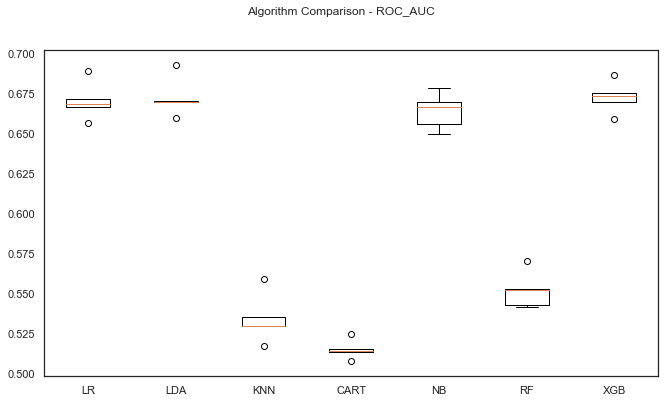

In [83]:
#Run corss validation on unbalance data
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
#models.append(('SVM', SVC(gamma='auto')))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

for name, model in models:
        kfold = 5 #KFold(n_splits=3, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
        
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison - ROC_AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Using unbalance data XGBoost, Logistic regression and NB are look best

In [84]:
#SMote resampling helps to oversample the minority label
sm = SMOTE(random_state=27)#, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)



LR: 0.673489 (0.002924)
LDA: 0.673523 (0.002886)
KNN: 0.854428 (0.018917)
CART: 0.920612 (0.028673)
NB: 0.663500 (0.002348)
RF: 0.926870 (0.025594)
XGB: 0.881672 (0.026277)


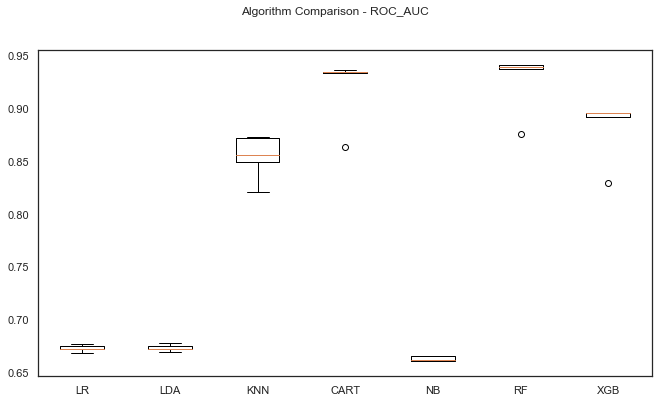

In [85]:
#Run models on balance test data
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
#models.append(('SVM', SVC(gamma='auto')))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

for name, model in models:
        kfold = 5 #KFold(n_splits=3, random_state=seed)
        cv_results = cross_val_score(model, X_train_res, y_train_res.ravel(), cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison - ROC_AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Using Balanced training data with cross validation the tree models, Kneighbours and XGBoost are very good.

LR: 0.670871 (0.010199)
CART: 0.507246 (0.009827)
RF: 0.509014 (0.008759)
XGB: 0.673044 (0.008926)


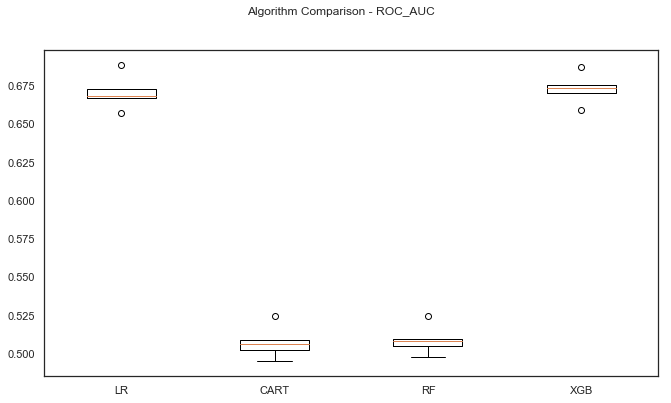

In [86]:
#Run models on unbalance test data using Class_Balance
# to feed the random state
seed = 7

# prepare models
models1 = []
models1.append(('LR', LogisticRegression(class_weight='balanced')))
#models1.append(('LDA', LinearDiscriminantAnalysis(class_weight='balanced')))
#models1.append(('KNN', KNeighborsClassifier(class_weight='balanced')))
models1.append(('CART', DecisionTreeClassifier(class_weight='balanced')))
#models1.append(('NB', GaussianNB(class_weight='balanced')))
models1.append(('RF', RandomForestClassifier(class_weight='balanced')))
models1.append(('XGB', XGBClassifier(class_weight='balanced')))
#models.append(('SVM', SVC(class_weight='balanced')))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

for name, model1 in models1:
        kfold = 5 #KFold(n_splits=3, random_state=seed)
        cv_results = cross_val_score(model1, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison - ROC_AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Using Class_Balance i.e. class weights for unbalance data it shows XGB is slighly better than Logistic rgression

#### Fit the models on Test data to verify their perfromance 

In [87]:
#Now fitting all models with balance training data and validating on unbalance test data
recall=[]
roc_score=[]
f1_score=[]
accuracy=[]
speci=[]
sensi=[]

for i in (0,1,2,3,4,5,6):
    clf=models[i][1].fit(X_train_res, y_train_res)
    clf_pred_prob=clf.predict_proba(X_test.values)[:, 1]
    clf_pred_class=clf.predict(X_test.values)
    
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, clf_pred_class, average='binary')
    
    recall.append(metrics.recall_score(y_test, clf_pred_class))
    roc_score.append(metrics.roc_auc_score(y_test, clf_pred_prob))
    f1_score.append(metrics.f1_score(y_test, clf_pred_class))
    accuracy.append(metrics.accuracy_score(y_test, clf_pred_class))
    sensi.append(sensitivity)
    speci.append(specificity)
    #print(models[i][1])



In [88]:
print("AUC:    \t", roc_score)
print("f1:    \t",f1_score)
print("Accuracy:    \t",accuracy)
print("Sesnitivity:    \t",sensi)
print("Specificity:    \t",speci)


#After fitting all models with SMOTE balance training data and checking metric on 'unblanced' test -->Logistic reg is the best

AUC:    	 [0.6755235974842603, 0.6757433127437467, 0.501395085636638, 0.4608675515873119, 0.6736726925974268, 0.4703737513503333, 0.6029332477577273]
f1:    	 [0.11846528341254202, 0.11835275118237398, 0.09366602687140116, 0.08313619466035824, 0.12301740812379111, 0.07914659325533378, 0.06915629322268327]
Accuracy:    	 [0.5646075456575256, 0.5624320146562088, 0.8648308238392397, 0.8446785366691475, 0.6106372015801225, 0.8467968168546401, 0.9229404019007271]
Sesnitivity:    	 [0.6990424076607387, 0.7017783857729138, 0.16689466484268126, 0.16826265389876882, 0.652530779753762, 0.1573187414500684, 0.06839945280437756]
Specificity:    	 [0.5587356596558317, 0.5563456022944551, 0.8953154875717018, 0.8742232313575525, 0.608807361376673, 0.8769120458891013, 0.9602652963671128]


![](Model_Comparison1.png)

In [89]:
#Now fitting all models with class weight balanced

models1 = []
models1.append(('LR', LogisticRegression(class_weight='balanced')))
#models1.append(('LDA', LinearDiscriminantAnalysis(class_weight='balanced')))
#models1.append(('KNN', KNeighborsClassifier(class_weight='balanced')))
models1.append(('CART', DecisionTreeClassifier(class_weight='balanced')))
#models1.append(('NB', GaussianNB(class_weight='balanced')))
models1.append(('RF', RandomForestClassifier(class_weight='balanced')))
models1.append(('XGB', XGBClassifier(class_weight='balanced')))

recall=[]
roc_score=[]
f1_score=[]
accuracy=[]
speci=[]
sensi=[]

for i in (0,1,2,3):
    clf=models1[i][1].fit(X_train, y_train)
    clf_pred_prob=clf.predict_proba(X_test)[:, 1]
    clf_pred_class=clf.predict(X_test)
    
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, clf_pred_class, average='binary')
    
    recall.append(metrics.recall_score(y_test, clf_pred_class))
    roc_score.append(metrics.roc_auc_score(y_test, clf_pred_prob))
    f1_score.append(metrics.f1_score(y_test, clf_pred_class))
    accuracy.append(metrics.accuracy_score(y_test, clf_pred_class))
    sensi.append(sensitivity)
    speci.append(specificity)
    #print(models[i][1])



C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
print("AUC:    \t", roc_score)
print("f1:    \t",f1_score)
print("Accuracy:    \t",accuracy)
print("Sesnitivity:    \t",sensi)
print("Specificity:    \t",speci)

#After training on unbalance data with class_weight. Logistic reg has same AUC but XGboost has increased AUC. However the threshold will not be close to zero

AUC:    	 [0.6758684556240567, 0.4891938591546717, 0.48805147058823534, 0.6815583288431206]
f1:    	 [0.11879100281162139, 0.0903225806451613, 0.09064469219583131, 0.0]
Accuracy:    	 [0.5693593633709281, 0.7255395889391424, 0.7851949390278812, 0.9581496536325642]
Sesnitivity:    	 [0.6935704514363885, 0.32558139534883723, 0.2558139534883721, 0.0]
Specificity:    	 [0.563934034416826, 0.7430090822179732, 0.8083173996175909, 1.0]


![](Model_Comparison2.png)

In [91]:
#Now fitting all models with unbalanced training data and validating on unbalance test data
recall=[]
roc_score=[]
f1_score=[]
accuracy=[]
speci=[]
sensi=[]

for i in (0,1,2,3,4,5,6):
    clf=models[i][1].fit(X_train, y_train)
    clf_pred_prob=clf.predict_proba(X_test)[:, 1]
    clf_pred_class=clf.predict(X_test)
    
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, clf_pred_class, average='binary')
    
    recall.append(metrics.recall_score(y_test, clf_pred_class))
    roc_score.append(metrics.roc_auc_score(y_test, clf_pred_prob))
    f1_score.append(metrics.f1_score(y_test, clf_pred_class))
    accuracy.append(metrics.accuracy_score(y_test, clf_pred_class))
    sensi.append(sensitivity)
    speci.append(specificity)
    #print(models[i][1])

C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
print("AUC:    \t", roc_score)
print("f1:    \t",f1_score)
print("Accuracy:    \t",accuracy)
print("Sesnitivity:    \t",sensi)
print("Specificity:    \t",speci)

AUC:    	 [0.6754242842252292, 0.6764858326162071, 0.5392127572826454, 0.4956949950040935, 0.6740177142158388, 0.521664676586985, 0.6815583288431206]
f1:    	 [0.0, 0.0, 0.0026666666666666666, 0.03181336161187699, 0.13631687242798354, 0.016867469879518072, 0.0]
Accuracy:    	 [0.9581496536325642, 0.9581496536325642, 0.9571763897635541, 0.9477300051525734, 0.8077517604625866, 0.9532833342875136, 0.9581496536325642]
Sesnitivity:    	 [0.0, 0.0, 0.0013679890560875513, 0.02051983584131327, 0.3625170998632011, 0.009575923392612859, 0.0]
Specificity:    	 [1.0, 1.0, 0.9989244741873805, 0.9882289674952199, 0.8271988527724665, 0.9945028680688337, 1.0]


#### Explore Logistic regression and XGboost

In [93]:
#Logistic Regression trainined on SMOTE train data
clf=LogisticRegression()

LR_smote=clf.fit(X_train_res, y_train_res)

pred_prob=LR_smote.predict_proba(X_test.values)[:, 1]
pred_class=LR_smote.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)


0.6755235974842603
0.11846528341254202
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     16736
         1.0       0.06      0.70      0.12       731

    accuracy                           0.56     17467
   macro avg       0.52      0.63      0.41     17467
weighted avg       0.94      0.56      0.69     17467

0.6990424076607387
[[9351 7385]
 [ 220  511]]


In [94]:
#Logistic Regression trainined on SMOTE train data
clf=LogisticRegression(class_weight='balanced')

LR_bal=clf.fit(X_train, y_train)

pred_prob=LR_bal.predict_proba(X_test.values)[:, 1]
pred_class=LR_bal.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)
#Marginally better AUC and f1 compared to LR trained on SMOTE

0.6758684556240567
0.11879100281162139
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.72     16736
         1.0       0.06      0.69      0.12       731

    accuracy                           0.57     17467
   macro avg       0.52      0.63      0.42     17467
weighted avg       0.94      0.57      0.69     17467

0.6935704514363885
[[9438 7298]
 [ 224  507]]


In [95]:
#XGBosst trained using class_weigh estimater
clf = XGBClassifier(class_weight='balanced')

XG_bal=clf.fit(X_train, y_train)

pred_prob=XG_bal.predict_proba(X_test)[:, 1]
pred_class=XG_bal.predict(X_test)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

#AUC is better but probality threshold is not close to 0.5. WIll require fine tuning

0.6815583288431206
0.0
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     16736
         1.0       0.00      0.00      0.00       731

    accuracy                           0.96     17467
   macro avg       0.48      0.50      0.49     17467
weighted avg       0.92      0.96      0.94     17467

0.0
[[16736     0]
 [  731     0]]


C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [96]:
#Logistic Regression trainined on SMOTE train data
clf=XGBClassifier()

XG_smote=clf.fit(X_train_res, y_train_res)

pred_prob=XG_smote.predict_proba(X_test.values)[:, 1]
pred_class=XG_smote.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)


0.6029332477577273
0.06915629322268327
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     16736
         1.0       0.07      0.07      0.07       731

    accuracy                           0.92     17467
   macro avg       0.51      0.51      0.51     17467
weighted avg       0.92      0.92      0.92     17467

0.06839945280437756
[[16071   665]
 [  681    50]]


In [97]:
#So far logistic regression with 
# 1)fitted with class balance estimator and 
# 2) Trained on smote balanced data look best

#### Feature Selection Using RFE

In [98]:
X_train_res = pd.DataFrame(X_train_res) #convert to pd
X_train_res.columns = X_train.columns

In [99]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 6)             # running RFE with 6 variables as output- arrived iteratively
rfe = rfe.fit(X_train_res, y_train_res)

In [100]:
col = X_train_res.columns[rfe.support_]
print(col)

Index(['Avgas CC Utilization in last 12 months',
       'No of trades opened in last 12 months',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of times 30 DPD or worse in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of trades opened in last 6 months'],
      dtype='object')


In [101]:
X_train_res[col].head()

,Avgas CC Utilization in last 12 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 12 months,No of PL trades opened in last 6 months,No of trades opened in last 6 months
0,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409
1,0.799246,0.865398,0.828596,0.269272,0.314271,0.270409
2,-0.499292,-0.228771,-0.183212,0.269272,-0.400317,0.270409
3,0.799246,0.865398,0.828596,0.269272,0.314271,0.270409
4,-0.499292,-0.228771,-0.368049,-0.710764,0.314271,0.270409


In [102]:
col

Index(['Avgas CC Utilization in last 12 months',
       'No of trades opened in last 12 months',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of times 30 DPD or worse in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of trades opened in last 6 months'],
      dtype='object')

In [103]:
X_train_res=X_train_res[col]
X_test=X_test[col]

clf=LogisticRegression()
LR_smote_rfe=clf.fit(X_train_res, y_train_res)  #Logistic reg trained on smote balanced data with only rfe feaures

pred_prob=LR_smote_rfe.predict_proba(X_test.values)[:, 1]
pred_class=LR_smote_rfe.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)


0.6739759045598763
0.11820385547731735
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     16736
         1.0       0.06      0.70      0.12       731

    accuracy                           0.56     17467
   macro avg       0.52      0.63      0.41     17467
weighted avg       0.94      0.56      0.68     17467

0.7004103967168263
[[9316 7420]
 [ 219  512]]


In [104]:
X_train=X_train[col]
X_test=X_test[col]

clf=LogisticRegression(class_weight='balanced')
LR_bal_rfe=clf.fit(X_train, y_train)  #Logistic reg trained on balanced data with only rfe feaures using class_weight estimator

pred_prob=LR_bal_rfe.predict_proba(X_test.values)[:, 1]
pred_class=LR_bal_rfe.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)


0.6747303583712823
0.11832545265828626
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     16736
         1.0       0.06      0.70      0.12       731

    accuracy                           0.56     17467
   macro avg       0.52      0.63      0.41     17467
weighted avg       0.94      0.56      0.68     17467

0.7017783857729138
[[9309 7427]
 [ 218  513]]


With 6 top features the model is still performing same as with all features - recall, roc_auc, f1 same

Logistic reg trained on balanced data with only rfe feaures using class_weight estimator is margnially better

##### Assessing the model with StatsModels

In [105]:
import statsmodels.api as sm

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary() #P values less than 0.05. Model is stable at 6 top features

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                52400
Model:                            GLM   Df Residuals:                    52393
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8784.5
Date:                Fri, 20 Dec 2019   Deviance:                       17569.
Time:                        09:42:31   Pearson chi2:                 5.18e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1193      0.023   -136.586      0.000      -3.164      -3.075
Avgas CC Utilization in last 12 months                             -0.5104      0.055     -9.247      0.000      -0.619      -0.402
No of trades opened in last 12 months                              -0.2228      0.081     -2.748      0.006      -0.382      -0.064
No of Inquiries in last 12 months (excluding home & auto loans)    -0.4113      0.076     -5.422      0.000      -0.560      -0.263
No of times 30 DPD or worse in last 12 months                      -0.4621      0.052     -8.915      0.000      -0.564      -0.361
No of PL trades opened in last 6 months                            -0.2142      0.097     -2.199      0.028      -0.405      -0.023
No of trades opened in last 6 months                                0.2416      0.111      2.170      0.030       0.023       0.460
===================================================================================================================================
"""

#### CHecking VIFs

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,No of trades opened in last 12 months,3.12
5,No of trades opened in last 6 months,3.00
4,No of PL trades opened in last 6 months,2.96
2,No of Inquiries in last 12 months (excluding h...,2.36
0,Avgas CC Utilization in last 12 months,1.70
3,No of times 30 DPD or worse in last 12 months,1.28


col=col.insert(0,'Performance Tag')
col

Area under ROC curve 0.6747303583712823


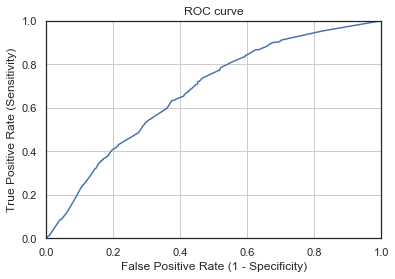

In [109]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print('Area under ROC curve', metrics.roc_auc_score(y_test, pred_prob))


Tune the models

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
# Tune Logistic reg trained on smote balanced data with only rfe feaures
logistic = LogisticRegression()

# create pipeline
steps = [("logistic", logistic)        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1,0.2,0.3,0.4, 0.5, 1, 2, 3, 4], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
LR_smote_rfe_tuned = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')

LR_smote_rfe_tuned.fit(X_train_res, y_train_res)

# print best hyperparameters
print("Best AUC: ", LR_smote_rfe_tuned.best_score_)
print("Best hyperparameters: ", LR_smote_rfe_tuned.best_params_)

Best AUC:  0.6706113501038186
Best hyperparameters:  {'logistic__C': 0.4, 'logistic__penalty': 'l2'}


In [112]:
pred_prob=LR_smote_rfe_tuned.predict_proba(X_test.values)[:, 1]
pred_class=LR_smote_rfe_tuned.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

0.6739759862991842
0.11820385547731735
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     16736
         1.0       0.06      0.70      0.12       731

    accuracy                           0.56     17467
   macro avg       0.52      0.63      0.41     17467
weighted avg       0.94      0.56      0.68     17467

0.7004103967168263
[[9316 7420]
 [ 219  512]]


In [113]:
#GAIN LIFT Table
df_full=df_woe[~df_woe['Performance Tag'].isna()]#pd.concat([df_woe,reject_woe])
#Combine dataframe - full list of applicants

pred=LR_smote_rfe_tuned.predict_proba(df_full[col])[:, 1]

pred = pred.reshape(-1)
(pred)

df_full['predict_prob'] = pred

prediction=df_full[['Performance Tag','predict_prob' ]]
prediction=prediction.sort_values(by=['predict_prob'], ascending= True)

prediction['decile'] = pd.qcut(prediction['predict_prob'].rank(method='first'), 10, labels=np.arange(10, 0, -1))

lift=pd.crosstab(columns=prediction["Performance Tag"], index=prediction["decile"])
lift=lift.sort_values(by=['decile'], ascending= False)
lift['Decile']=range(1,11)


lift['total']=lift[0.0]+lift[1.0]
lift=lift.drop(0,axis=1)


lift.rename({1.0:'bad'}, axis=1, inplace=True)
lift['cum-bad'] = lift['bad'].cumsum() #Cumulative sum of response
lift['bad_gain'] = round(100*(lift['cum-bad']/sum(lift['bad'])),2)


lift['cumlift'] = round(lift['bad_gain']/(lift['Decile'].astype('int')*(100/10)),2)


lift=lift[['Decile','total','bad', 'cum-bad','bad_gain','cumlift']]
lift

Performance Tag,Decile,total,bad,cum-bad,bad_gain,cumlift
decile,,,,,,
1,1,6987,574,574,19.47,1.95
2,2,6987,556,1130,38.33,1.92
3,3,6986,379,1509,51.19,1.71
4,4,6987,386,1895,64.28,1.61
5,5,6986,322,2217,75.20,1.50
6,6,6987,236,2453,83.21,1.39
7,7,6987,209,2662,90.30,1.29
8,8,6986,95,2757,93.52,1.17
9,9,6987,77,2834,96.13,1.07


In [114]:
# Tune Logistic reg trained on balanced data with only rfe feaures using class_weight estimator
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("logistic", logistic)        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.03,0.05,0.07,0.1,0.2,0.3,0.4, 0.5, 1, 2, 3, 4], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
LR_bal_rfe_tuned = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc')

LR_bal_rfe_tuned.fit(X_train, y_train)

# print best hyperparameters
print("Best AUC: ", LR_bal_rfe_tuned.best_score_)
print("Best hyperparameters: ", LR_bal_rfe_tuned.best_params_)

Best AUC:  0.6693288010239636
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [115]:
pred_prob=LR_bal_rfe_tuned.predict_proba(X_test.values)[:, 1]
pred_class=LR_bal_rfe_tuned.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

0.6748488803676568
0.11832545265828626
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     16736
         1.0       0.06      0.70      0.12       731

    accuracy                           0.56     17467
   macro avg       0.52      0.63      0.41     17467
weighted avg       0.94      0.56      0.68     17467

0.7017783857729138
[[9309 7427]
 [ 218  513]]


In [116]:
df_full=df_woe[~df_woe['Performance Tag'].isna()]#pd.concat([df_woe,reject_woe])
#Combine dataframe - full list of applicants

pred=LR_bal_rfe_tuned.predict_proba(df_full[col])[:, 1]

pred = pred.reshape(-1)
(pred)

df_full['predict_prob'] = pred

prediction=df_full[['Performance Tag','predict_prob' ]]
prediction=prediction.sort_values(by=['predict_prob'], ascending= True)

prediction['decile'] = pd.qcut(prediction['predict_prob'].rank(method='first'), 10, labels=np.arange(10, 0, -1))

lift=pd.crosstab(columns=prediction["Performance Tag"], index=prediction["decile"])
lift=lift.sort_values(by=['decile'], ascending= False)
lift['Decile']=range(1,11)


lift['total']=lift[0.0]+lift[1.0]
lift=lift.drop(0,axis=1)


lift.rename({1.0:'bad'}, axis=1, inplace=True)
lift['cum-bad'] = lift['bad'].cumsum() #Cumulative sum of response
lift['bad_gain'] = round(100*(lift['cum-bad']/sum(lift['bad'])),2)


lift['cumlift'] = round(lift['bad_gain']/(lift['Decile'].astype('int')*(100/10)),2)


lift=lift[['Decile','total','bad', 'cum-bad','bad_gain','cumlift']]
lift

Performance Tag,Decile,total,bad,cum-bad,bad_gain,cumlift
decile,,,,,,
1,1,6987,576,576,19.54,1.95
2,2,6987,556,1132,38.40,1.92
3,3,6986,381,1513,51.32,1.71
4,4,6987,397,1910,64.79,1.62
5,5,6986,311,2221,75.34,1.51
6,6,6987,232,2453,83.21,1.39
7,7,6987,210,2663,90.33,1.29
8,8,6986,96,2759,93.59,1.17
9,9,6987,73,2832,96.07,1.07


Tune with ALL features using PCA

In [349]:
pca = PCA()
pca.fit(X_train)
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))
#11 features show 95% of vairance

0      53.56
1      67.56
2      75.15
3      80.62
4      84.14
5      86.00
6      87.75
7      89.35
8      90.87
9      92.37
10     93.79
11     95.13
12     96.19
13     97.14
14     97.96
15     98.60
16     99.12
17     99.59
18     99.70
19     99.80
20     99.88
21     99.92
22     99.95
23     99.98
24     99.99
25    100.00
26    100.00
dtype: float64


In [117]:
#Creating the X and y variables - whole data and ALL features
X = df_woe[~df_woe['Performance Tag'].isna()].drop('Performance Tag', 1)
y = df_woe[~df_woe['Performance Tag'].isna()]["Performance Tag"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [119]:
#SMote resampling helps to oversample the minority label
sm = SMOTE(random_state=27)#, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [120]:
# PCA
pca = PCA()

# Tune Logistic reg trained on smote balanced data
logistic = LogisticRegression()

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [10,11,12,13,14], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
LR_smote_pca_tuned = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')


LR_smote_pca_tuned.fit(X_train_res, y_train_res)

# print best hyperparameters
print("Best AUC: ", LR_smote_pca_tuned.best_score_)
print("Best hyperparameters: ", LR_smote_pca_tuned.best_params_)

Best AUC:  0.6735902008456398
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 13}


In [121]:
pred_prob=LR_smote_pca_tuned.predict_proba(X_test.values)[:, 1]
pred_class=LR_smote_pca_tuned.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

0.6755756654233573
0.11889004992453268
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.71     16736
         1.0       0.06      0.70      0.12       731

    accuracy                           0.57     17467
   macro avg       0.52      0.63      0.42     17467
weighted avg       0.94      0.57      0.69     17467

0.7004103967168263
[[9366 7370]
 [ 219  512]]


In [122]:
train_col = X_train.columns

In [123]:
#GAIN LIFT Table
df_full=df_woe[~df_woe['Performance Tag'].isna()]


pred=LR_smote_pca_tuned.predict_proba(df_full[train_col])[:, 1]

pred = pred.reshape(-1)
(pred)

df_full['predict_prob'] = pred

prediction=df_full[['Performance Tag','predict_prob' ]]
prediction=prediction.sort_values(by=['predict_prob'], ascending= True)

prediction['decile'] = pd.qcut(prediction['predict_prob'].rank(method='first'), 10, labels=np.arange(10, 0, -1))

lift=pd.crosstab(columns=prediction["Performance Tag"], index=prediction["decile"])
lift=lift.sort_values(by=['decile'], ascending= False)
lift['Decile']=range(1,11)


lift['total']=lift[0.0]+lift[1.0]
lift=lift.drop(0,axis=1)


lift.rename({1.0:'bad'}, axis=1, inplace=True)
lift['cum-bad'] = lift['bad'].cumsum() #Cumulative sum of response
lift['bad_gain'] = round(100*(lift['cum-bad']/sum(lift['bad'])),2)


lift['cumlift'] = round(lift['bad_gain']/(lift['Decile'].astype('int')*(100/10)),2)


lift=lift[['Decile','total','bad', 'cum-bad','bad_gain','cumlift']]
lift

Performance Tag,Decile,total,bad,cum-bad,bad_gain,cumlift
decile,,,,,,
1,1,6987,600,600,20.35,2.04
2,2,6987,533,1133,38.43,1.92
3,3,6986,394,1527,51.80,1.73
4,4,6987,375,1902,64.52,1.61
5,5,6986,314,2216,75.17,1.50
6,6,6987,241,2457,83.34,1.39
7,7,6987,202,2659,90.20,1.29
8,8,6986,109,2768,93.89,1.17
9,9,6987,98,2866,97.22,1.08


In [124]:
# PCA
pca = PCA()

# Tune Logistic reg trained using class_balance estimator
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [10,11,12,13,14], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
LR_bal_pca_tuned = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')


LR_bal_pca_tuned.fit(X_train, y_train)

# print best hyperparameters
print("Best AUC: ", LR_bal_pca_tuned.best_score_)
print("Best hyperparameters: ", LR_bal_pca_tuned.best_params_)

Best AUC:  0.6719112968172872
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 13}


In [125]:
pred_prob=LR_bal_pca_tuned.predict_proba(X_test.values)[:, 1]
pred_class=LR_bal_pca_tuned.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

0.6760733760688231
0.11938548141198545
              precision    recall  f1-score   support

         0.0       0.98      0.56      0.72     16736
         1.0       0.07      0.70      0.12       731

    accuracy                           0.57     17467
   macro avg       0.52      0.63      0.42     17467
weighted avg       0.94      0.57      0.69     17467

0.6963064295485636
[[9449 7287]
 [ 222  509]]


In [126]:
#GAIN LIFT Table
df_full=df_woe[~df_woe['Performance Tag'].isna()]

pred=LR_bal_pca_tuned.predict_proba(df_full[train_col])[:, 1]  #predict using model

pred = pred.reshape(-1)
(pred)

df_full['predict_prob'] = pred

prediction=df_full[['Performance Tag','predict_prob' ]]
prediction=prediction.sort_values(by=['predict_prob'], ascending= True)

prediction['decile'] = pd.qcut(prediction['predict_prob'].rank(method='first'), 10, labels=np.arange(10, 0, -1))

lift=pd.crosstab(columns=prediction["Performance Tag"], index=prediction["decile"])
lift=lift.sort_values(by=['decile'], ascending= False)
lift['Decile']=range(1,11)


lift['total']=lift[0.0]+lift[1.0]
lift=lift.drop(0,axis=1)


lift.rename({1.0:'bad'}, axis=1, inplace=True)
lift['cum-bad'] = lift['bad'].cumsum() #Cumulative sum of response
lift['bad_gain'] = round(100*(lift['cum-bad']/sum(lift['bad'])),2)


lift['cumlift'] = round(lift['bad_gain']/(lift['Decile'].astype('int')*(100/10)),2)


lift=lift[['Decile','total','bad', 'cum-bad','bad_gain','cumlift']]
lift

Performance Tag,Decile,total,bad,cum-bad,bad_gain,cumlift
decile,,,,,,
1,1,6987,593,593,20.12,2.01
2,2,6987,542,1135,38.50,1.92
3,3,6986,402,1537,52.14,1.74
4,4,6987,355,1892,64.18,1.60
5,5,6986,323,2215,75.14,1.50
6,6,6987,247,2462,83.51,1.39
7,7,6987,196,2658,90.16,1.29
8,8,6986,111,2769,93.93,1.17
9,9,6987,106,2875,97.52,1.08


In [198]:
# PCA
pca = PCA()

# Tune XBboost model with class balance estimator
XG = XGBClassifier(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("XG", XG)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [7,8,9,10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
XG_bal_pca_tuned = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')


XG_bal_pca_tuned.fit(X_train, y_train)

# print best hyperparameters
print("Best AUC: ", XG_bal_pca_tuned.best_score_)
print("Best hyperparameters: ", XG_bal_pca_tuned.best_params_)

Best AUC:  0.6734489429817652
Best hyperparameters:  {'pca__n_components': 10}


In [199]:
pred_prob=XG_bal_pca_tuned.predict_proba(X_test.values)[:, 1]
pred_class=XG_bal_pca_tuned.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

0.6748073567992718
0.0
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     16736
         1.0       0.00      0.00      0.00       731

    accuracy                           0.96     17467
   macro avg       0.48      0.50      0.49     17467
weighted avg       0.92      0.96      0.94     17467

0.0
[[16736     0]
 [  731     0]]


C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [200]:
#GAIN LIFT Table
df_full=df_woe[~df_woe['Performance Tag'].isna()]

pred=XG_bal_pca_tuned.predict_proba(df_full[train_col])[:, 1]  #predict using model

pred = pred.reshape(-1)
(pred)

df_full['predict_prob'] = pred

prediction=df_full[['Performance Tag','predict_prob' ]]
prediction=prediction.sort_values(by=['predict_prob'], ascending= True)

prediction['decile'] = pd.qcut(prediction['predict_prob'].rank(method='first'), 10, labels=np.arange(10, 0, -1))

lift=pd.crosstab(columns=prediction["Performance Tag"], index=prediction["decile"])
lift=lift.sort_values(by=['decile'], ascending= False)
lift['Decile']=range(1,11)


lift['total']=lift[0.0]+lift[1.0]
lift=lift.drop(0,axis=1)


lift.rename({1.0:'bad'}, axis=1, inplace=True)
lift['cum-bad'] = lift['bad'].cumsum() #Cumulative sum of response
lift['bad_gain'] = round(100*(lift['cum-bad']/sum(lift['bad'])),2)


lift['cumlift'] = round(lift['bad_gain']/(lift['Decile'].astype('int')*(100/10)),2)


lift=lift[['Decile','total','bad', 'cum-bad','bad_gain','cumlift']]
lift

Performance Tag,Decile,total,bad,cum-bad,bad_gain,cumlift
decile,,,,,,
1,1,6987,780,780,26.46,2.65
2,2,6987,513,1293,43.86,2.19
3,3,6986,422,1715,58.18,1.94
4,4,6987,319,2034,69.00,1.72
5,5,6986,278,2312,78.43,1.57
6,6,6987,203,2515,85.31,1.42
7,7,6987,177,2692,91.32,1.30
8,8,6986,111,2803,95.08,1.19
9,9,6987,91,2894,98.17,1.09


In [ ]:
#Takes very long to run

In [260]:
   
# PCA
pca = PCA()

# XGBoost using class balance estimator
XG = XGBClassifier(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("XG", XG)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [10],"XG__learning_rate"    : [0.05, 0.15, 0.30 ] ,
 "XG__max_depth"        : [ 3, 4, 5, 6, ],
 "XG__min_child_weight" : [ 1, 3, 5],
 "XG__gamma"            : [ 0.0, 0.1, 0.2 ],
 "XG__colsample_bytree" : [ 0.3, 0.4 ]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
XG_bal_pca_tuned1 = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')


XG_bal_pca_tuned1.fit(X_train, y_train)

# print best hyperparameters
print("Best AUC: ", XG_bal_pca_tuned1.best_score_)
print("Best hyperparameters: ", XG_bal_pca_tuned1.best_params_)

Best AUC:  0.6751324675939239
Best hyperparameters:  {'XG__colsample_bytree': 0.3, 'XG__gamma': 0.2, 'XG__learning_rate': 0.05, 'XG__max_depth': 3, 'XG__min_child_weight': 3, 'pca__n_components': 10}


In [261]:
pred_prob=XG_bal_pca_tuned1.predict_proba(X_test.values)[:, 1]
pred_class=XG_bal_pca_tuned1.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

0.6785619292961526
0.0
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     16736
         1.0       0.00      0.00      0.00       731

    accuracy                           0.96     17467
   macro avg       0.48      0.50      0.49     17467
weighted avg       0.92      0.96      0.94     17467

0.0
[[16736     0]
 [  731     0]]


C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [262]:
#GAIN LIFT Table
df_full=df_woe[~df_woe['Performance Tag'].isna()]

pred=XG_bal_pca_tuned1.predict_proba(df_full[train_col])[:, 1]  #predict using model

pred = pred.reshape(-1)
(pred)

df_full['predict_prob'] = pred

prediction=df_full[['Performance Tag','predict_prob' ]]
prediction=prediction.sort_values(by=['predict_prob'], ascending= True)

prediction['decile'] = pd.qcut(prediction['predict_prob'].rank(method='first'), 10, labels=np.arange(10, 0, -1))

lift=pd.crosstab(columns=prediction["Performance Tag"], index=prediction["decile"])
lift=lift.sort_values(by=['decile'], ascending= False)
lift['Decile']=range(1,11)


lift['total']=lift[0.0]+lift[1.0]
lift=lift.drop(0,axis=1)


lift.rename({1.0:'bad'}, axis=1, inplace=True)
lift['cum-bad'] = lift['bad'].cumsum() #Cumulative sum of response
lift['bad_gain'] = round(100*(lift['cum-bad']/sum(lift['bad'])),2)


lift['cumlift'] = round(lift['bad_gain']/(lift['Decile'].astype('int')*(100/10)),2)


lift=lift[['Decile','total','bad', 'cum-bad','bad_gain','cumlift']]
lift

Performance Tag,Decile,total,bad,cum-bad,bad_gain,cumlift
decile,,,,,,
1,1,6987,703,703,23.85,2.39
2,2,6987,518,1221,41.42,2.07
3,3,6986,427,1648,55.90,1.86
4,4,6987,322,1970,66.82,1.67
5,5,6986,289,2259,76.63,1.53
6,6,6987,233,2492,84.53,1.41
7,7,6987,178,2670,90.57,1.29
8,8,6986,116,2786,94.50,1.18
9,9,6987,108,2894,98.17,1.09


In [162]:
# PCA
pca = PCA()

# XGboost fitted on smote balanced train data 
XG = XGBClassifier()

# create pipeline
steps = [("pca", pca),
         ("XG", XG)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [7,8,9,10,11,12,13,14]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
XG_smote_pca_tuned = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')


XG_smote_pca_tuned.fit(X_train_res, y_train_res)

# print best hyperparameters
print("Best AUC: ", XG_smote_pca_tuned.best_score_)
print("Best hyperparameters: ", XG_smote_pca_tuned.best_params_)

Best AUC:  0.7278173048595207
Best hyperparameters:  {'pca__n_components': 12}


In [201]:
pred_prob=XG_smote_pca_tuned.predict_proba(X_test.values)[:, 1]
pred_class=XG_smote_pca_tuned.predict(X_test.values)
confusion = metrics.confusion_matrix(y_test, pred_class)
print(metrics.roc_auc_score(y_test, pred_prob))  
print(metrics.f1_score(y_test, pred_class))  
print(classification_report(y_test, pred_class))
print(metrics.recall_score(y_test, pred_class))
print(confusion)

0.6576043794613315
0.11753278290432248
              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73     16736
         1.0       0.06      0.66      0.12       731

    accuracy                           0.58     17467
   macro avg       0.52      0.62      0.42     17467
weighted avg       0.94      0.58      0.70     17467

0.6621067031463749
[[9715 7021]
 [ 247  484]]


In [202]:
#GAIN LIFT Table
df_full=df_woe[~df_woe['Performance Tag'].isna()]

pred=XG_smote_pca_tuned.predict_proba(df_full[train_col])[:, 1]  #predict using model

pred = pred.reshape(-1)
(pred)

df_full['predict_prob'] = pred

prediction=df_full[['Performance Tag','predict_prob' ]]
prediction=prediction.sort_values(by=['predict_prob'], ascending= True)

prediction['decile'] = pd.qcut(prediction['predict_prob'].rank(method='first'), 10, labels=np.arange(10, 0, -1))

lift=pd.crosstab(columns=prediction["Performance Tag"], index=prediction["decile"])
lift=lift.sort_values(by=['decile'], ascending= False)
lift['Decile']=range(1,11)


lift['total']=lift[0.0]+lift[1.0]
lift=lift.drop(0,axis=1)


lift.rename({1.0:'bad'}, axis=1, inplace=True)
lift['cum-bad'] = lift['bad'].cumsum() #Cumulative sum of response
lift['bad_gain'] = round(100*(lift['cum-bad']/sum(lift['bad'])),2)


lift['cumlift'] = round(lift['bad_gain']/(lift['Decile'].astype('int')*(100/10)),2)


lift=lift[['Decile','total','bad', 'cum-bad','bad_gain','cumlift']]
lift

Performance Tag,Decile,total,bad,cum-bad,bad_gain,cumlift
decile,,,,,,
1,1,6987,710,710,24.08,2.41
2,2,6987,525,1235,41.89,2.09
3,3,6986,422,1657,56.21,1.87
4,4,6987,357,2014,68.32,1.71
5,5,6986,288,2302,78.09,1.56
6,6,6987,222,2524,85.62,1.43
7,7,6987,169,2693,91.35,1.30
8,8,6986,119,2812,95.39,1.19
9,9,6987,80,2892,98.10,1.09


XG_bal_pca_tuned seems the best model with one of the high AUC and best gain-lift chart. Deploy this model

### Finding Optimal Cutoff Point

#### Cutoff while predicting on Test data

In [313]:
y_test_pred = XG_bal_pca_tuned.predict_proba(X_test)[:, 1]


y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})


# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x >= 0.5 else 0)
y_test_pred_final.head()

# roc - same as before when tested on smote train dataset - ok
roc = metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob )
print(roc)

# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(100)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

0.6748073567992718


,Churn,Churn_Prob,predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,...,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
26758,0.0,0.021628,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40284,0.0,0.073119,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67833,0.0,0.121613,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47092,0.0,0.052839,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63565,0.0,0.082407,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [314]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,
0.01,
0.02,
0.03,
0.04,
0.05,
0.06,
0.07,
0.08,
0.09,
0.1,
0.11,
0.12,
0.13,
0.14,
0.15,
0.16,
0.17,
0.18,
0.19,
0.2,
0.21]

for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.041850  1.000000  0.000000
0.01  0.01  0.098013  0.990424  0.059034
0.02  0.02  0.313047  0.912449  0.286867
0.03  0.03  0.429725  0.830369  0.412225
0.04  0.04  0.523959  0.753762  0.513922
0.05  0.05  0.647736  0.610123  0.649379
0.06  0.06  0.758115  0.466484  0.770853
0.07  0.07  0.814565  0.324213  0.835982
0.08  0.08  0.885155  0.154583  0.917065
0.09  0.09  0.923169  0.077975  0.960086
0.10  0.10  0.940287  0.034200  0.979864
0.11  0.11  0.949047  0.019152  0.989663
0.12  0.12  0.951680  0.015048  0.992591
0.13  0.13  0.954428  0.010944  0.995638
0.14  0.14  0.956489  0.008208  0.997909
0.15  0.15  0.957062  0.005472  0.998626
0.16  0.16  0.957463  0.005472  0.999044
0.17  0.17  0.957806  0.004104  0.999462
0.18  0.18  0.957806  0.001368  0.999582
0.19  0.19  0.957863  0.000000  0.999701
0.20  0.20  0.957921  0.000000  0.999761
0.21  0.21  0.957978  0.000000  0.999821


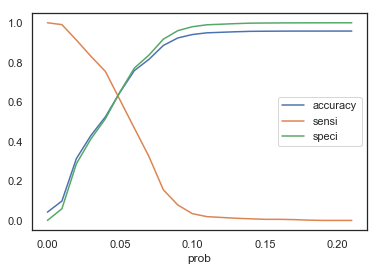

In [315]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#The optimum probablity is 0.05. This is a very skewed model probablity

Deploy Model on Rejected Datset


In [320]:
#reject
reject_woe=reject.copy()

In [321]:
for var in feature_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    small_df=small_df[final_iv['MIN_VALUE'].notnull()]
    
    small_df_null = final_iv[final_iv['VAR_NAME'] == var][final_iv['MIN_VALUE'].isnull()]
    nan_woe=small_df_null['WOE'].mean()  #Store the WOE for missing bin
    
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items(), key=lambda kv: kv[0], reverse=False):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
        #print(var)
        #print(i)
        #print(replace_cmd)
        #print(replace_cmd1)
    replace_cmd = replace_cmd + 'nan_woe'
    replace_cmd1 = replace_cmd1 + 'nan_woe'
    
    
    if replace_cmd != '0':
        try:
            reject_woe[transform_prefix + var] = reject_woe[var].apply(lambda x: eval(replace_cmd))
            #print(replace_cmd)
            #print('try')
            #print('x')
            #print(df_woe[transform_prefix + var])
        except:
            #print(df_woe[var])
            reject_woe[transform_prefix + var] = reject_woe[var].apply(lambda x: eval(replace_cmd1))
            #print(replace_cmd1)
            #print('except')
            #print(x)
            #print(df_woe[transform_prefix + var])
            
    #if len(small_df_null.index) > 0:
        #print(nan_woe)

C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reind

C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anambiar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reind

col=['Avgas CC Utilization in last 12 months',
       'No of trades opened in last 12 months',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of times 30 DPD or worse in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of trades opened in last 6 months']
      
col1=(pd.DataFrame(X_train_res)).columns
col1
      

In [136]:
X_train.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
16675,-0.033903,-0.031820,0.004047,0.009778,0.243466,0.024417,0.028710,-0.080446,0.253229,0.123307,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.574668,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,0.237012,-0.090387,0.686484,-0.011997
5701,-0.033903,-0.031820,0.004047,-0.005042,0.243466,-0.017081,0.028710,0.004373,-0.206976,0.007512,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.799246,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,-0.071871,0.098546,-0.210878,0.138547
43155,-0.033903,0.010033,-0.023074,-0.005042,0.028980,0.018328,0.028710,0.004373,-0.206976,0.007512,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,-0.499292,0.270409,-0.228771,-0.400317,0.453449,-0.292286,-0.183212,-0.071871,0.098546,-0.210878,-0.011997
15286,-0.033903,0.010033,-0.023074,-0.005042,0.028980,0.018328,0.013652,0.004373,0.253229,-0.166783,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.799246,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,0.237012,-0.090387,0.686484,-0.011997
57723,0.009546,0.010033,0.004047,0.009778,-0.056375,-0.017081,0.028710,-0.003794,-0.206976,0.072037,0.036804,0.121316,-0.742491,-0.723329,-0.694835,-0.710764,-0.499292,0.270409,-0.228771,0.314271,0.453449,-0.292286,-0.368049,-0.071871,0.098546,-0.210878,-0.011997


In [137]:
train_col = X_train.columns
train_col

Index(['Age', 'Gender', 'Marital Status (at the time of application)',
       'No of dependents', 'Income', 'Education', 'Profession ',
       'Type of residence', 'No of months in current residence',
       'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home lo

In [138]:
reject_woe.shape

(1425, 29)

In [244]:
reject_woe.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                    1425
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

In [140]:
train_col

Index(['Age', 'Gender', 'Marital Status (at the time of application)',
       'No of dependents', 'Income', 'Education', 'Profession ',
       'Type of residence', 'No of months in current residence',
       'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home lo

In [327]:
prediction=XG_bal_pca_tuned.predict_proba(reject_woe[train_col])[:, 1]
prediction = prediction.reshape(-1)
len(prediction)

1425

In [328]:

reject_woe['predict_prob'] = prediction

In [318]:
reject_woe.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,predict_prob,Performance Tag Predict
69600,906908303,-0.033903,0.010033,-0.023074,-0.005042,-0.292291,-0.017081,0.028710,0.004373,-0.206976,0.007512,NaN,0.036804,0.121316,-0.742491,0.133954,-0.694835,-0.710764,-0.367972,-0.354561,-0.368106,-0.400317,-0.39584,-0.292286,-0.183212,-0.071871,-0.090387,-0.332107,-0.011997,0.074903,1
69601,10990583,0.009546,-0.031820,0.004047,0.009778,-0.056375,-0.007594,-0.092553,0.004373,-0.206976,0.007512,NaN,0.036804,0.121316,0.198371,-0.723329,-0.694835,-0.710764,-0.367972,-0.354561,-0.228771,-0.400317,-0.39584,-0.292286,-0.368049,-0.071871,-0.090387,-0.210878,-0.011997,0.075196,1
69602,589678446,0.009546,0.010033,0.004047,-0.005042,-0.292291,0.018328,-0.092553,0.004373,0.253229,0.007512,NaN,-0.835745,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.499292,0.270409,-0.228771,-0.400317,-0.39584,0.319569,-0.183212,-0.071871,0.098546,-0.210878,-0.011997,0.120926,1
69603,809411322,0.009546,0.010033,0.004047,-0.005042,-0.056375,-0.007594,0.028710,0.004373,0.253229,0.072037,NaN,0.036804,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.499292,0.270409,-0.228771,0.314271,-0.39584,-0.292286,-0.368049,-0.071871,-0.090387,-0.210878,-0.011997,0.087129,1
69604,150246616,0.009546,-0.031820,0.004047,0.009778,-0.056375,0.024417,0.028710,0.004373,0.253229,0.072037,NaN,-0.835745,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.367972,-0.354561,-0.228771,-0.400317,-0.39584,-0.292286,-0.368049,-0.071871,-0.090387,-0.210878,0.138547,0.085512,1


In [329]:
reject_woe['Performance Tag Predict']=reject_woe.predict_prob.map( lambda x: 1 if x > 0.05 else 0)

In [330]:
reject_woe[reject_woe['Performance Tag Predict']==0].shape

#Only 11 customers out of 1425 would be accepted. Nice!

(11, 31)

### Develop Application Scorecard using odds

![](Application_Scorecard.png)

In [142]:
#Score=A*log(odds)+B. Solving for A and B. Base score is 400 at odds 10:1 and pdo=20
A=20/(np.log(20)-np.log(10))
B=400-A*np.log(10)


In [331]:
df_full=df_woe[~df_woe['Performance Tag'].isna()]#pd.concat([df_woe,reject_woe])
#Combine dataframe - full list of applicants

prediction=XG_bal_pca_tuned.predict_proba(df_full[train_col])[:, 1]

prediction = prediction.reshape(-1)
(prediction)

df_full['predict_prob'] = prediction

df_full['odds'] = (1-df_full['predict_prob'])/df_full['predict_prob']

df_full['log_odds']=np.log(df_full['odds'])
df_full['Score']=A*df_full['log_odds']+B
df_full=df_full.sort_values(by=['Score'], ascending= False)

In [332]:
df_full[df_full['Performance Tag']==1].tail()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,predict_prob,odds,log_odds,Score
67469,-0.033903,0.010033,0.004047,-0.005042,-0.056375,-0.017081,0.028710,0.004373,0.253229,0.007512,1.0,-0.835745,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.499292,-0.354561,-0.368106,-0.400317,-0.39584,0.319569,-0.183212,-0.071871,-0.090387,-0.210878,-0.011997,0.249265,3.011799,1.102538,365.373946
68160,0.028507,-0.031820,0.004047,0.009778,-0.292291,0.018328,0.028710,-0.003794,0.253229,0.072037,1.0,-0.835745,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.367972,-0.354561,-0.368106,-0.400317,-0.39584,0.319569,-0.183212,-0.071871,-0.090387,-0.332107,-0.011997,0.280936,2.559529,0.939823,360.679004
69561,-0.033903,0.010033,0.004047,-0.005042,-0.292291,0.018328,0.013652,0.004373,0.253229,0.123307,1.0,-0.835745,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.367972,-0.354561,-0.368106,-0.400317,-0.39584,0.319569,-0.183212,-0.071871,0.098546,-0.332107,-0.011997,0.280936,2.559529,0.939823,360.679004
69022,0.028507,0.010033,0.004047,-0.005042,-0.292291,-0.017081,0.028710,-0.003794,0.253229,0.072037,1.0,-0.835745,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.367972,-0.354561,-0.368106,-0.400317,-0.39584,0.319569,-0.183212,-0.071871,-0.090387,-0.332107,-0.011997,0.280936,2.559529,0.939823,360.679004
69158,0.028507,0.010033,0.004047,-0.005042,-0.292291,-0.007594,-0.092553,0.004373,0.253229,0.123307,1.0,-0.835745,-0.743064,-0.742491,-0.723329,-0.694835,-0.710764,-0.367972,-0.354561,-0.368106,-0.400317,-0.39584,0.319569,-0.183212,-0.071871,0.098546,-0.332107,-0.011997,0.280936,2.559529,0.939823,360.679004


In [333]:
df_full[df_full['Performance Tag']==1].head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,predict_prob,odds,log_odds,Score
250,-0.033903,0.010033,-0.023074,-0.005042,0.243466,-0.017081,0.013652,-0.003794,-0.206976,0.072037,1.0,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.574668,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,0.237012,-0.090387,0.686484,-0.011997,0.008840,112.118668,4.719558,469.739090
4461,-0.033903,0.010033,0.004047,-0.005042,0.243466,0.018328,0.013652,-0.067765,-0.206976,0.007512,1.0,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.574668,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,0.237012,-0.090387,0.686484,-0.011997,0.008840,112.118668,4.719558,469.739090
1177,0.009546,0.010033,0.004047,-0.005042,0.263188,-0.017081,0.013652,0.004373,-0.206976,0.123307,1.0,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.574668,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,0.237012,-0.090387,0.686484,-0.011997,0.008840,112.118668,4.719558,469.739090
5170,-0.033903,0.010033,0.004047,-0.005042,0.263188,-0.007594,0.028710,0.004373,-0.206976,0.072037,1.0,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.574668,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,0.237012,-0.090387,0.686484,-0.011997,0.008840,112.118668,4.719558,469.739090
3391,0.009546,0.010033,0.004047,-0.005042,0.263188,0.018328,0.013652,0.004373,-0.206976,0.007512,1.0,0.036804,0.121316,0.198371,0.133954,0.200955,0.269272,0.574668,0.270409,0.865398,0.314271,0.453449,0.319569,0.828596,0.237012,-0.090387,0.686484,-0.011997,0.009043,109.586678,4.696716,469.080011


Text(0.5, 0, 'Application Score')

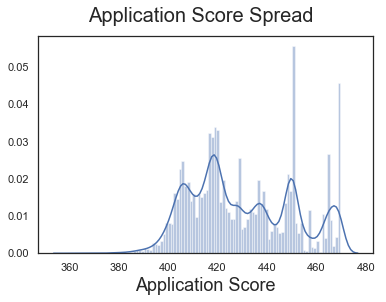

In [334]:
# Plot the histogram of the score
fig = plt.figure()
sns.distplot(df_full['Score'], bins = 100)
fig.suptitle('Application Score Spread', fontsize = 20)                  # Plot heading 
plt.xlabel('Application Score', fontsize = 18)   

Text(0.5, 0, 'Application Score')

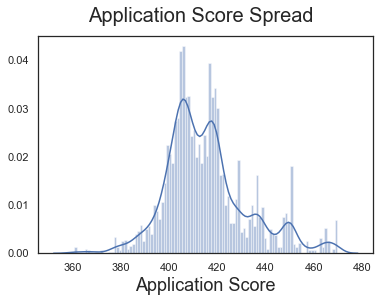

In [335]:
# Plot the histogram of the score
fig = plt.figure()
sns.distplot(df_full[df_full['Performance Tag']==1]['Score'], bins = 100)
fig.suptitle('Application Score Spread', fontsize = 20)                  # Plot heading 
plt.xlabel('Application Score', fontsize = 18)  

Text(0, 0.5, 'Application Score')

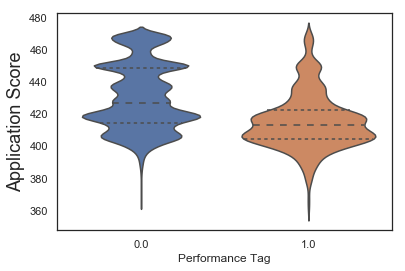

In [336]:
# plot
sns.violinplot( x=df_full["Performance Tag"], y=df_full["Score"], scale='area', scale_hue=False, inner='quartile', orient='v' )
fig.suptitle('Application Probablity Density Plot', fontsize = 20)                  # Plot heading 
plt.ylabel('Application Score', fontsize = 18)  


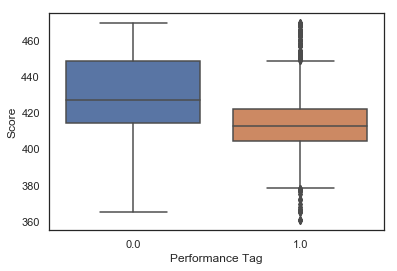

In [337]:
# plot
sns.boxplot( x=df_full["Performance Tag"], y=df_full["Score"])#, scale='area', scale_hue=False, inner='quartile', orient='v' )

In [350]:
#code to calculate how many dfaulters and good customer remain when various score threshold are applied
#score_sens = [0,315,320,325,330,335,340]
score_sens = [0,405,410,415,420,425,430]
defaulter=[]
good_customer=[]

for score in score_sens:
    screen_df=pd.DataFrame(df_full[df_full['Score']>score]['Performance Tag']) #customers base granted credit card for a score
    a=screen_df['Performance Tag'].sum()# no of defaulters
    defaulter.append(a)
    b=(screen_df['Performance Tag'].count()-screen_df['Performance Tag'].sum())# no of good customers
    good_customer.append(b)
    
print(score_sens)
print(defaulter)
print(good_customer)

[0, 405, 410, 415, 420, 425, 430]
[2948.0, 2156.0, 1660.0, 1341.0, 876.0, 647.0, 501.0]
[66919.0, 60579.0, 54291.0, 49629.0, 40071.0, 34556.0, 29983.0]


Inspect the overlap score

In [351]:
screen_df=pd.DataFrame(df_full[df_full['Score']>415])
screen_df[screen_df['Performance Tag']==1][col]

,Avgas CC Utilization in last 12 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of times 30 DPD or worse in last 12 months,No of PL trades opened in last 6 months,No of trades opened in last 6 months
250,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409
4461,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409
1177,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409
5170,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409
3391,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409
6498,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409
4852,0.799246,0.865398,0.828596,0.269272,0.314271,0.270409
4493,0.799246,0.865398,0.828596,0.269272,0.314271,0.270409
4743,0.799246,0.865398,0.828596,0.269272,0.314271,0.270409
3781,0.574668,0.865398,0.828596,0.269272,0.314271,0.270409


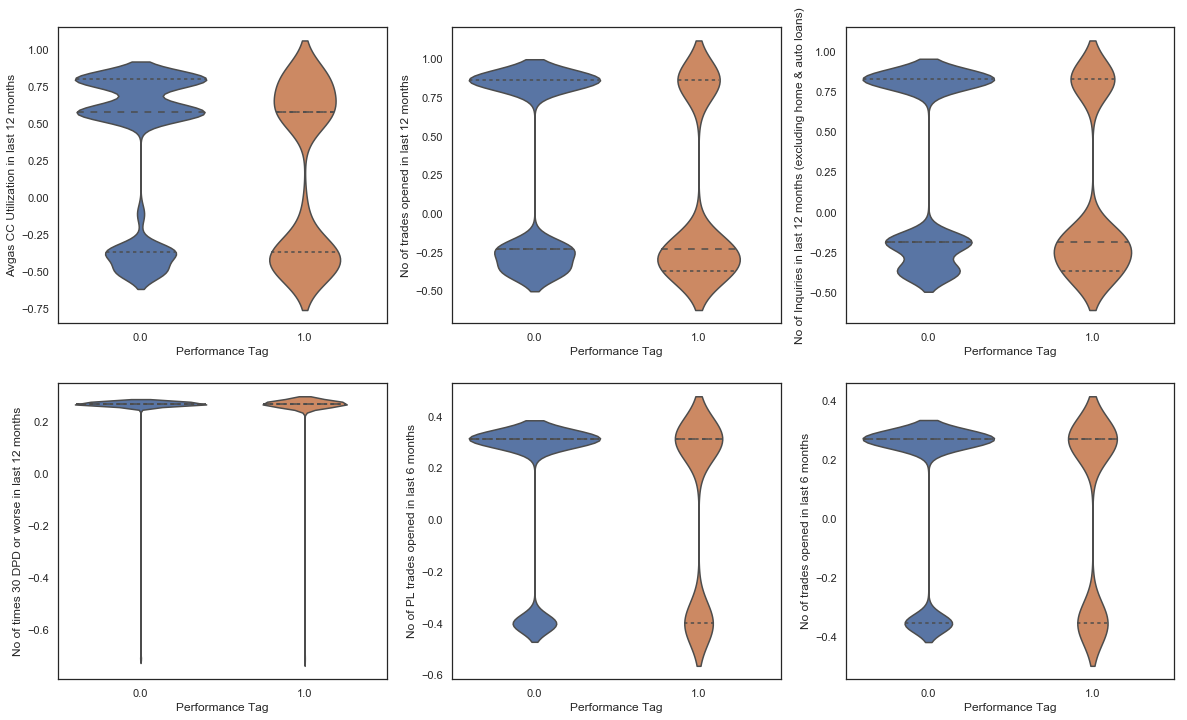

In [352]:
#Plot Numerical features violin plot
#https://dev.to/nexttech/how-to-perform-exploratory-data-analysis-with-seaborn-29eo
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
for variable, subplot in zip(col, ax.flatten()):
    sns.violinplot(x=screen_df["Performance Tag"], y=screen_df[variable],inner='quartile' , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

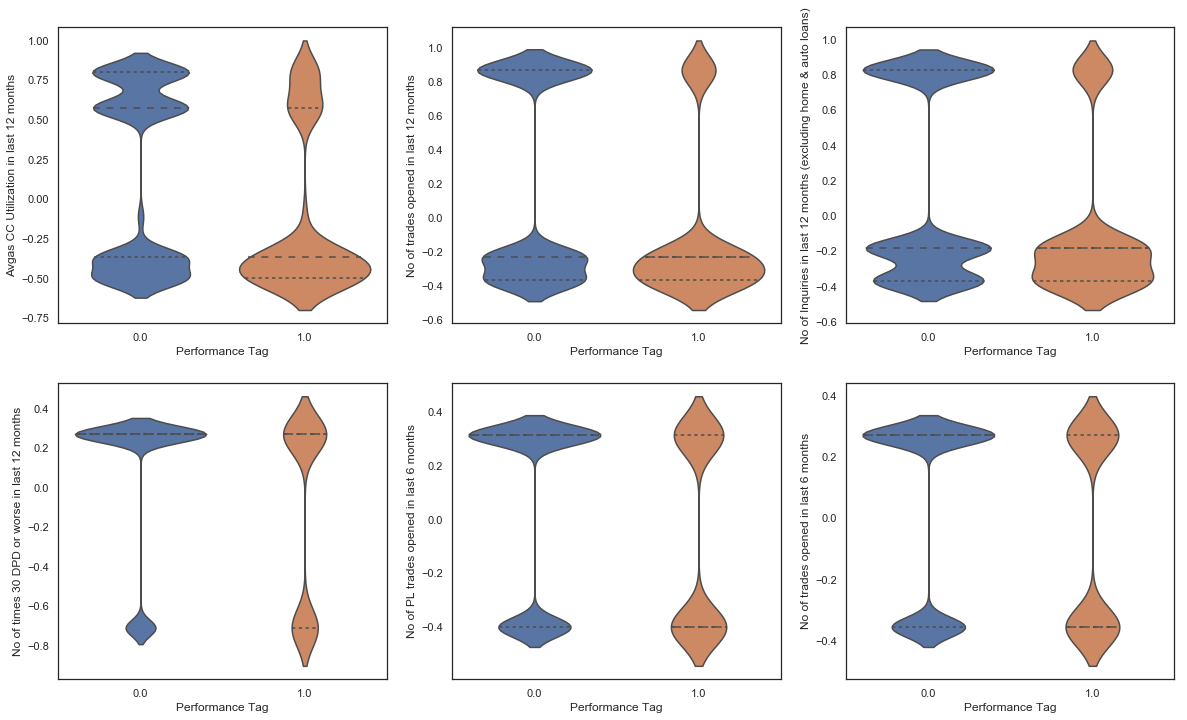

In [346]:
#Plot Numerical features violin plot
#https://dev.to/nexttech/how-to-perform-exploratory-data-analysis-with-seaborn-29eo
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
for variable, subplot in zip(col, ax.flatten()):
    sns.violinplot(x=screen_df["Performance Tag"], y=screen_df[variable],inner='quartile' , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)